# Mod 1 Project 

## Importing Data:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
%matplotlib inline


In [2]:
df = pd.read_csv("kc_house_data.csv")

## Aims and Articles:

https://en.wikipedia.org/wiki/King_County,_Washington
https://www.seattletimes.com/business/real-estate/why-are-seattle-area-home-prices-so-high/

Aims to keep in mind:
We need pick at least 3 coefficients for your final model of house price.

Explain their impact on the price of a house in this dataset.

Model should not include any predictors with p-values greater than .05.

# EDA

## Basics

In [3]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


The above table gives us a general overview to spot any problems with the data

There is no data that is negative when it should be positive

A house with 33 bedrooms! Worth checking out in case its an anomoly

describe() not showing date column (expected, as this may be a datetime object)

describe() not showing sqft_basement column, which is interesting and needs a look at



In [6]:
df.shape

(21597, 21)

Column Names and descriptions for Kings County Data Set

* **id** - unique identified for a house
* **dateDate** - The year the house was most recently sold
* **pricePrice** -  is prediction target (so is this not sales price?)
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  square footage of the home
* **sqft_lotsquare** -  square footage of the lot (ie the size of the land the house is on)
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront 
* **view** - Has been viewed (given as a number of views, most viewed house has 4)
* **condition** - How good the condition is ( Overall ) (ranked from 1 to 5)
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate (worth noting these are negative latitudes)
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [8]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Above tables show that sqft_basement is an object and we have null values in the waterfront, view, and yr_renovated columns.

In [9]:
duplicates = df.duplicated(subset=["id"], keep="first")
display(duplicates.value_counts())

duplicates = df.duplicated(subset=["id", "date"], keep="first")
display(duplicates.value_counts())

False    21420
True       177
dtype: int64

False    21597
dtype: int64

This suggests that we dont have duplicate entries

177 properties were resold

In [10]:
for x in list(df.columns):
    print(df[x].value_counts().head(10))

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
3969300030    2
2560801222    2
3883800011    2
2228900270    2
251300110     2
Name: id, dtype: int64
6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
3/25/2015    123
4/14/2015    121
4/28/2015    121
7/9/2014     121
4/22/2015    121
Name: date, dtype: int64
350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
325000.0    148
400000.0    145
375000.0    138
300000.0    133
525000.0    131
Name: price, dtype: int64
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
Name: bedrooms, dtype: int64
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
Name: bathrooms, dtype: int64
1300    138
1400    135
1440    133
1660    129
1010    129
1800    129
1820    128
1480    125
1720    125
1540    124
Name: sqft_living

sqft_basement has ? as a placement holder value 

## Further exploration - Histograms and Scatter Plots 

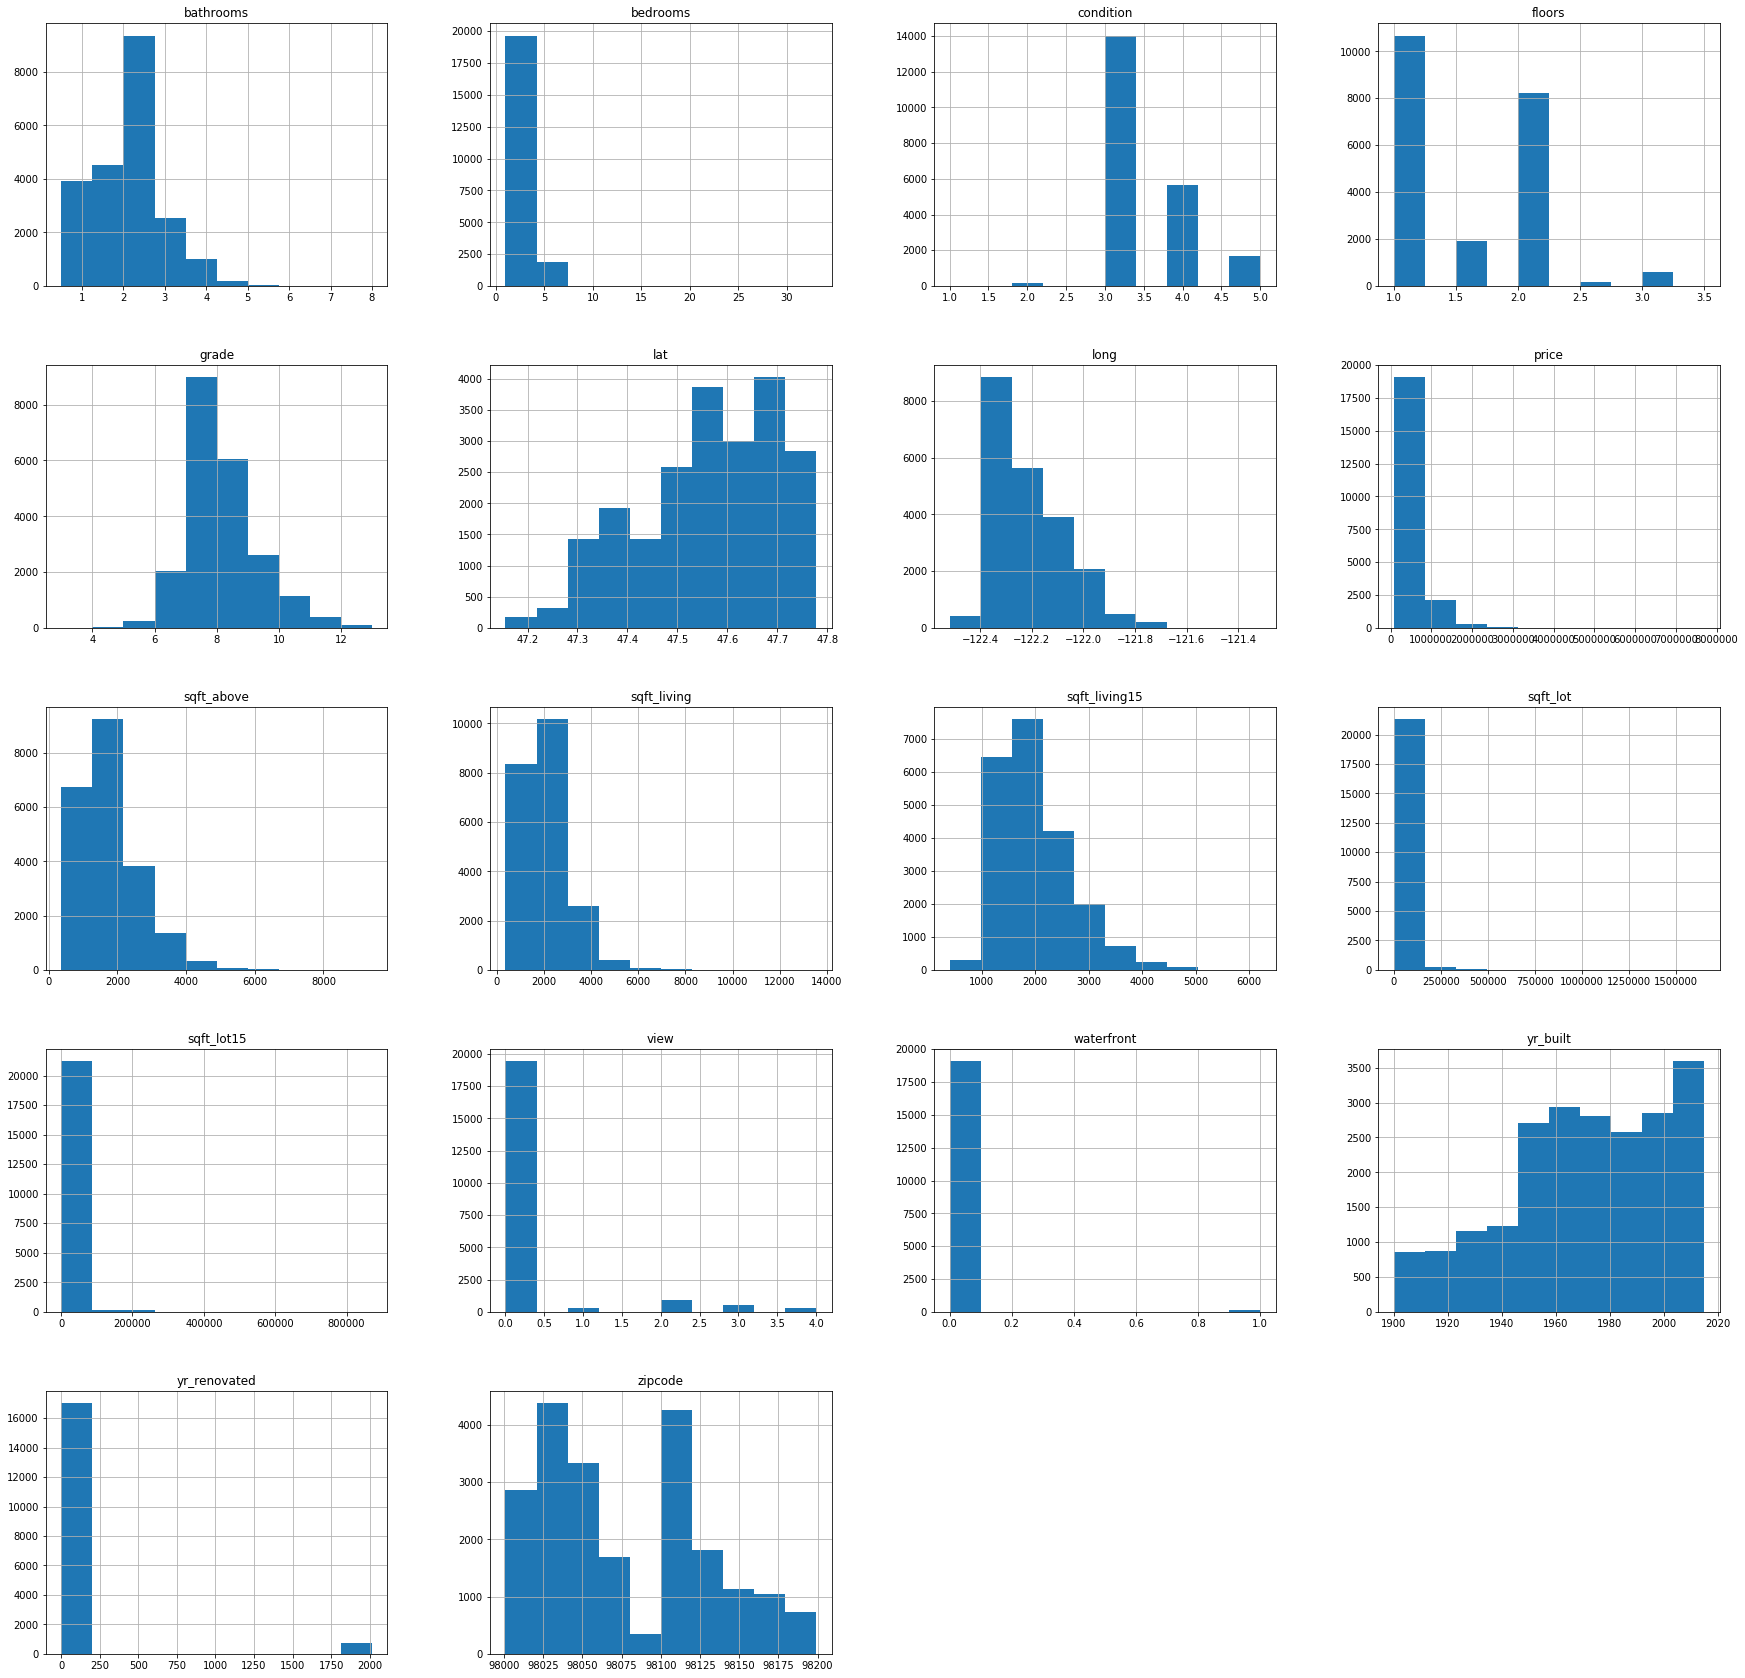

In [11]:
df_subset1 = df.drop(columns=["id", "date"], axis = 1)
df_subset1.hist(figsize  = [30, 30])
plt.show()

Helping us get to know the data better, nothing looks too out of the ordinary here

yr_renovated used 0 as a value for 'never renovated' which will make that data less useful unless adressed

Worth noting that some of these distrubutions look more normal than others, will be useful when deciding later which parameters to include in the model, and which we might want to scale/normalise 

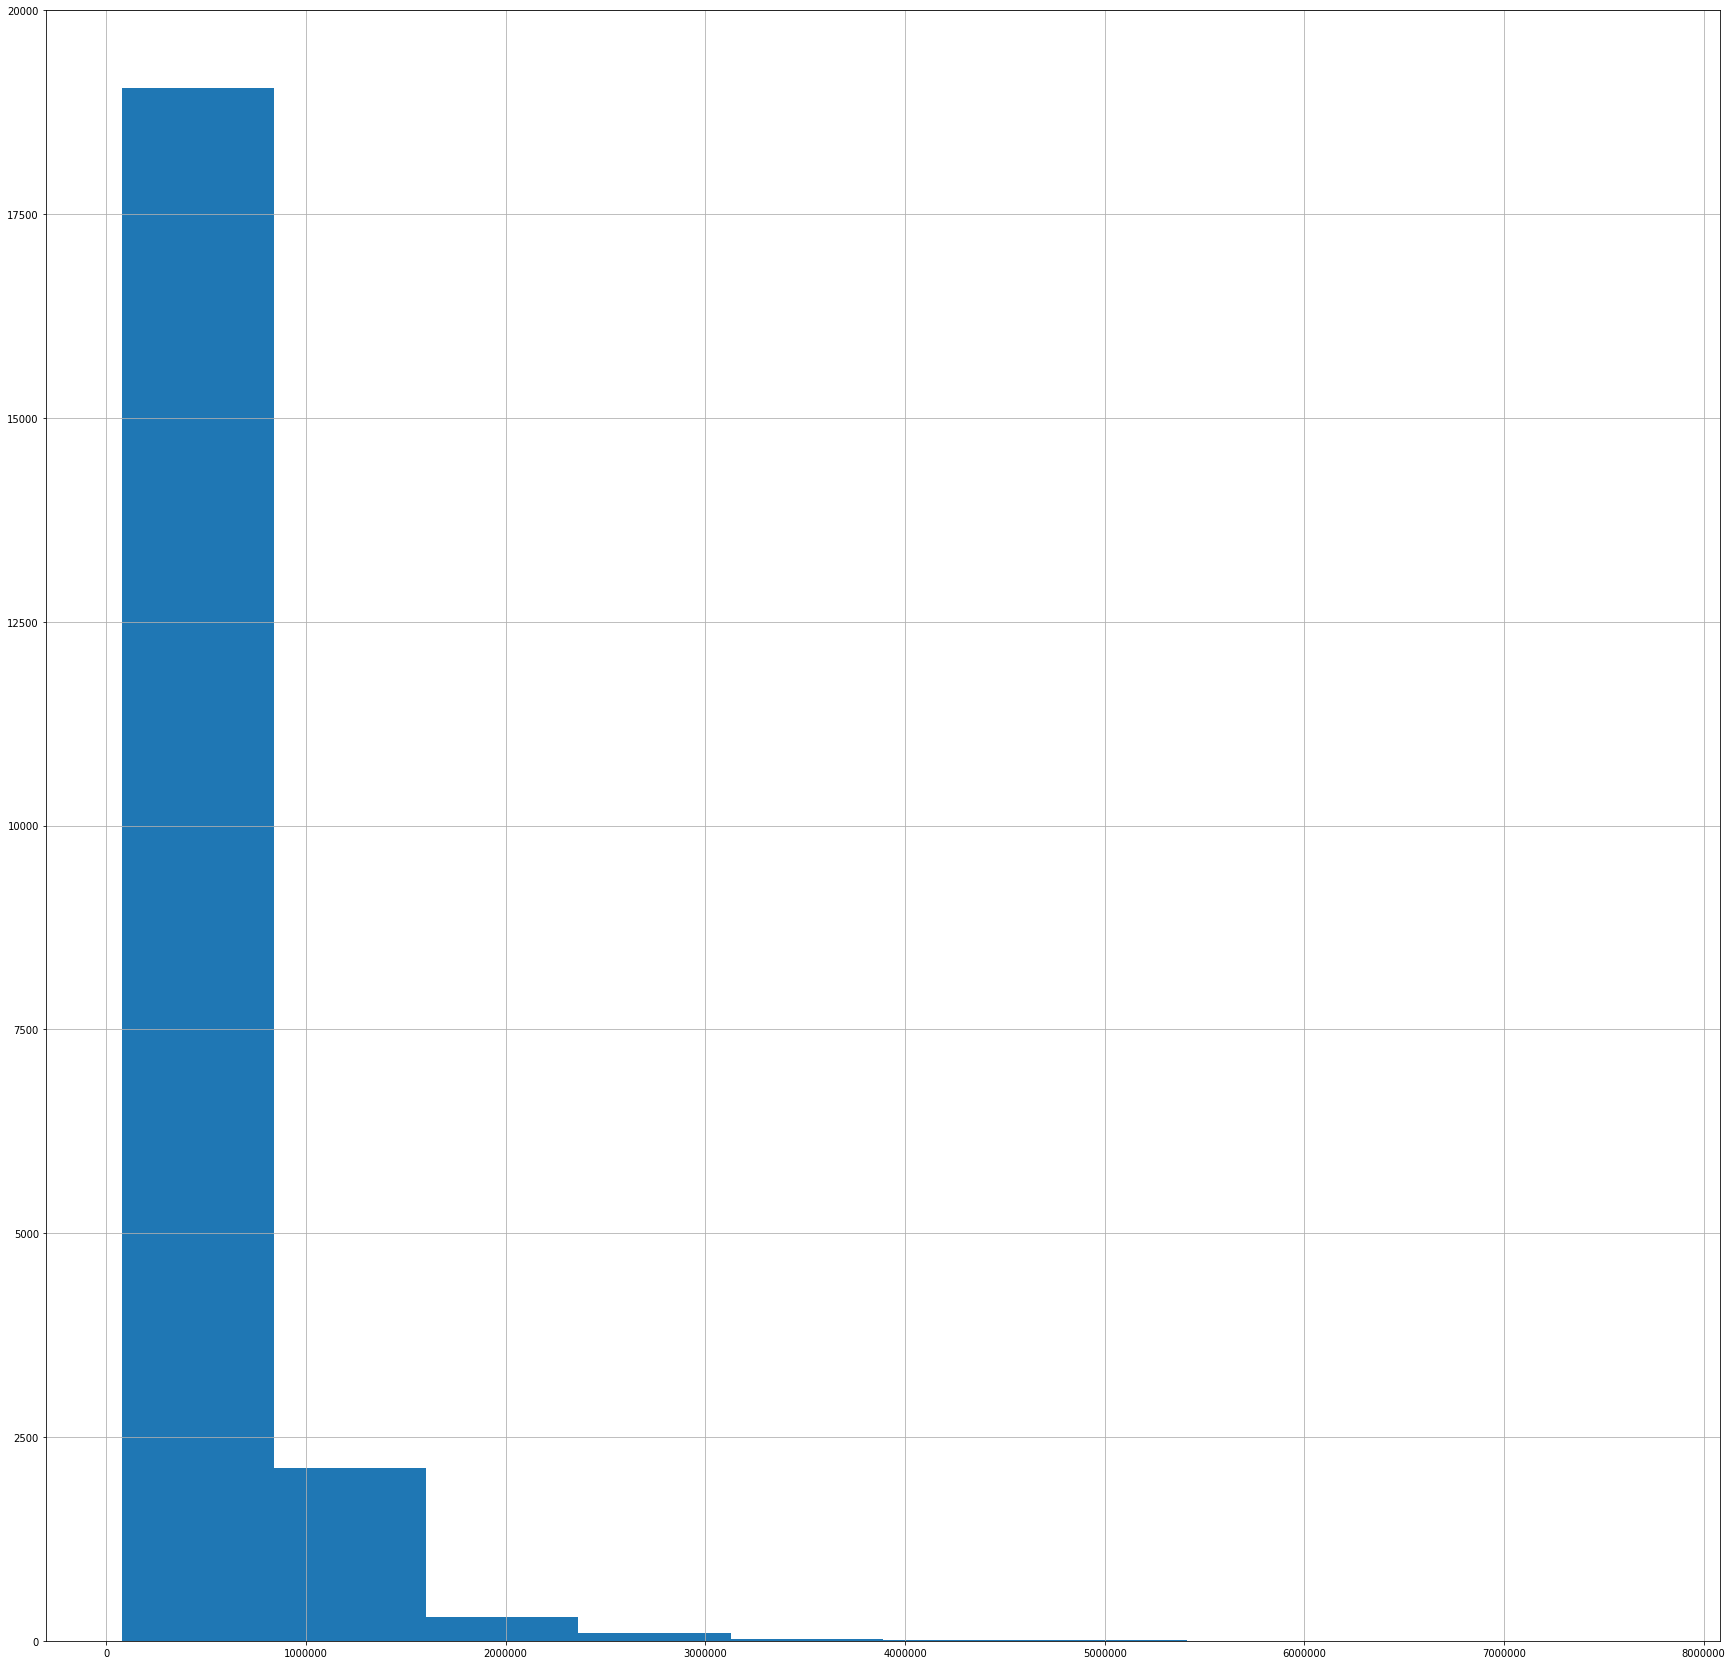

In [12]:
df.price.hist(figsize = [30,30])
plt.show()

Price is positively squewed, so it might be worth taking the logPrice to make our final model more accurate

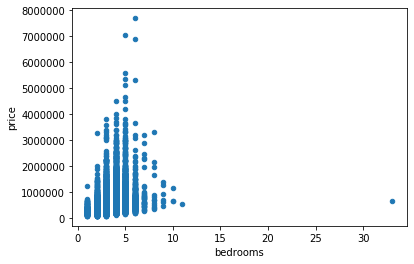

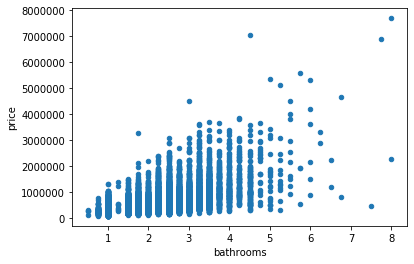

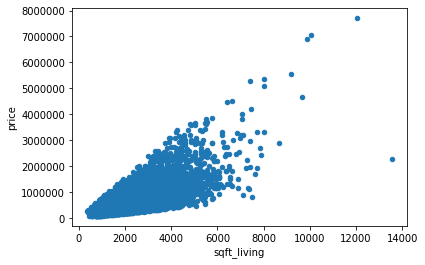

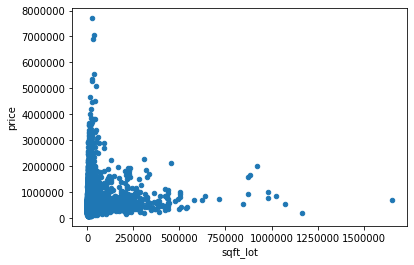

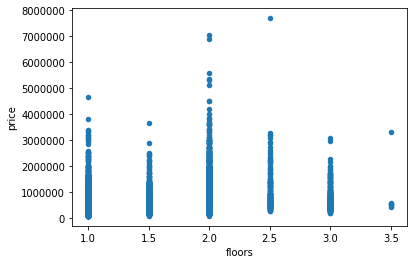

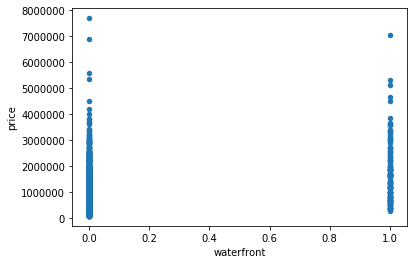

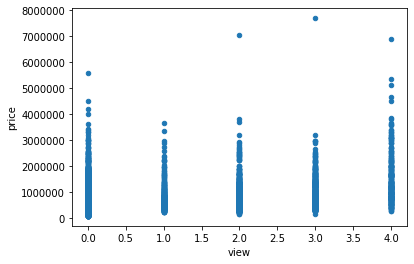

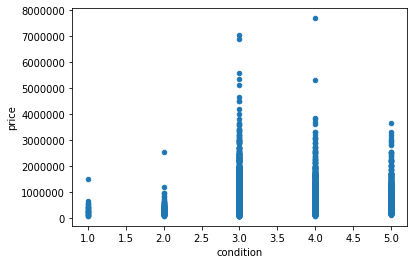

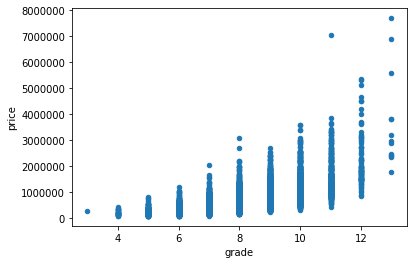

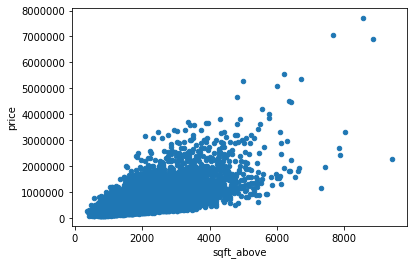

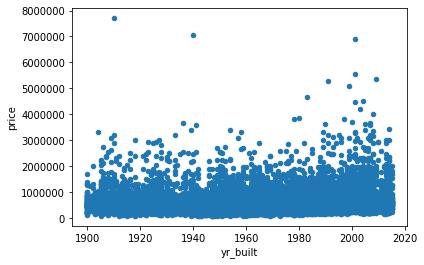

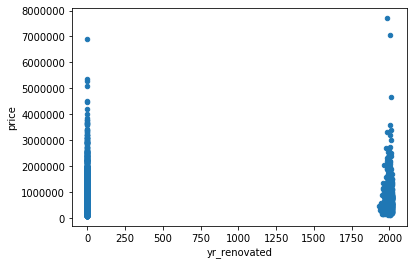

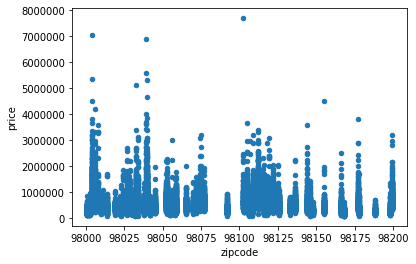

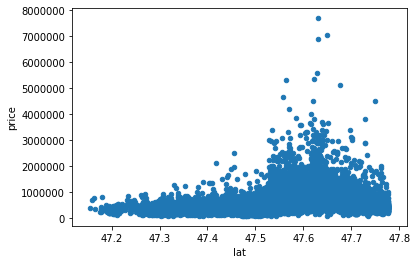

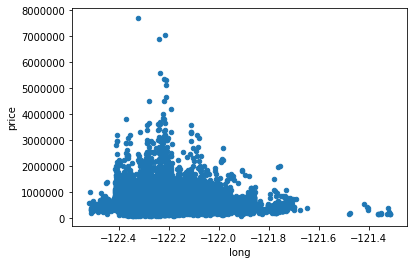

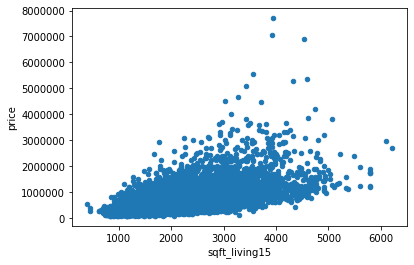

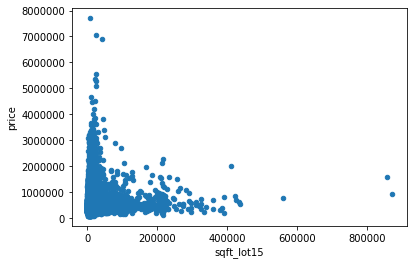

In [13]:
for x in ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']:
    df.plot.scatter(x,'price')
    
#sqft_basement not included as it still has placement value ?

Some of these are clearly categorical, worth noting as they will need addressing to include them in our model!

These outliers stood out to us:

In [14]:
#property with 33 bedrooms

df.loc[df["bedrooms"]==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [15]:
#property with 9 bedrooms and 7.5 bathrooms

df.loc[(df["bedrooms"]==9)&(df['bathrooms']==7.5)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8537,424049043,8/11/2014,450000.0,9,7.5,4050,6504,2.0,0.0,0.0,...,7,4050,0.0,1996,0.0,98144,47.5923,-122.301,1448,3866


In [16]:
#property with floor area of more than 13K sqft

df.loc[df["sqft_living"]>13000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12764,1225069038,5/5/2014,2280000.0,7,8.0,13540,307752,3.0,0.0,4.0,...,12,9410,4130.0,1999,0.0,98053,47.6675,-121.986,4850,217800


In [17]:
#property with lot area of more than 1.6mil sqft

df.loc[df["sqft_lot"] > 1600000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1717,1020069017,3/27/2015,700000.0,4,1.0,1300,1651359,1.0,0.0,3.0,...,6,1300,0.0,1920,0.0,98022,47.2313,-122.023,2560,425581


In [18]:
#nearest 15 neighbors' average lot area of more than 800K sqft

df.loc[df["sqft_lot15"] > 800000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9705,225079036,1/7/2015,937500.0,4,4.0,5545,871200,2.0,0.0,0.0,...,11,3605,1940.0,2003,0.0,98014,47.676,-121.882,3420,871200
20436,1125079111,4/15/2015,1600000.0,4,5.5,6530,871200,2.0,0.0,2.0,...,11,6530,0.0,2008,0.0,98014,47.664,-121.878,1280,858132


## Total Findings

Columns:

1- 'waterfront' and 'view' columns have null values that need dealing with

2 - We need to work on the ?s in the basement situation and check that the two square foots add to total sqr foot

3 - 'yr_renovated' 0.0 needs addressing, reassign zeros to yr_built, and has null values


Outliers:
    
1 - 33 bedroom house for 600k 

2 - 9 bedroom 7.5 bathroom house, for 450k in central Seattle zipcode with mean 600k

3 - sqft_living =  13540 for 2.28mil in the outskirts

4 - sqft_lot = 1651359 for 700k

5 - Two sqft_lot_15 = ~800000 which are nearly twice as large as any others in 20,000 dataset



## Dealing with null colums

In [19]:
df_test = df.copy()
df_test['waterfront'].fillna(value=2, inplace=True) #use 2 as placeholder fo NaN
df_test.groupby('waterfront')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
waterfront,,,,,,,,
0.0,19075.0,5.326420e+05,3.449592e+05,78000.0,320000.0,450000.0,638600.0,7700000.0
1.0,146.0,1.717215e+06,1.145385e+06,285000.0,827500.0,1510000.0,2282500.0,7060000.0
2.0,2376.0,5.294301e+05,3.250794e+05,80000.0,322875.0,445000.0,649612.5,3200000.0


This shows us that the null values for the waterfront column closely align to the values for no waterfront view.

This is our justification for reassigning the null value to zero, instead of to the mean or median 

In [20]:
df['waterfront'].fillna(value=0, inplace=True)
df['waterfront'].value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

Waterfront column cleaned!

In [21]:
df_test = df.copy()
df_test['view'].fillna(value=10, inplace=True) #use 10 as placeholder fo NaN
df_test.groupby('view')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
view,,,,,,,,
0.0,19422.0,4.968061e+05,287419.959567,78000.0,311525.0,432500.0,600000.0,5570000.0
1.0,330.0,8.133733e+05,512776.626107,217000.0,498250.0,691944.0,923750.0,3650000.0
2.0,957.0,7.913904e+05,510385.693444,169317.0,485000.0,675000.0,938000.0,7060000.0
3.0,508.0,9.732852e+05,613898.399842,154000.0,558000.0,802500.0,1260000.0,7700000.0
4.0,317.0,1.452466e+06,930747.701932,252000.0,815000.0,1180000.0,1850000.0,6890000.0
10.0,63.0,6.219582e+05,680927.087594,144000.0,322475.0,480000.0,679000.0,5300000.0


This shows us that the null values for the view column closely align to the values for zero views

This is our justification for reassigning the null value to zero, instead of to the mean or median 

In [22]:
df['view'].fillna(value=0, inplace=True)

View column cleaned!

yr_renovated column has many values that are 0.0, ie not renovated. There is no harm in reassigning these values to be equal to the year the house was built. We can apply the same assumption for the null values.

In [23]:
#placeholder yr_built for 0 and NaN
def proxy_yr_renovated(x):
    if ((x["yr_renovated"] == 0.0)| (np.isnan(x["yr_renovated"]))):
        return x["yr_built"]
    else:
        return x["yr_renovated"]

df["yr_renovated"] = df.apply(lambda x: proxy_yr_renovated(x), axis = 1)

df["yr_renovated"] = df["yr_renovated"].astype('int64')

df["yr_renovated"].tail()

21592    2009
21593    2014
21594    2009
21595    2004
21596    2008
Name: yr_renovated, dtype: int64

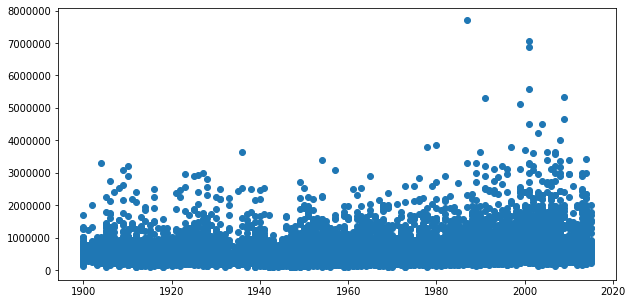

In [24]:
plt.figure(figsize = [10,5])
plt.scatter(df['yr_renovated'], df['price'])

Next, we will address the ? in the basement column. 
We will replicate column basement into a new column (basement2).
We will add a check_flr column to check if above + basement2 = living.
We will check to see if above + basement2 != living occur when there are ?'s or occur throughout the data.
We will reassign all the incorrect basement values to be living - above.

In [25]:
#copy basement (basement2): placeholder 0 for ?, change dtype to float
df["sqft_basement2"] = df.sqft_basement
df["sqft_basement2"].replace(to_replace = "?", value = 0, inplace = True) 
df["sqft_basement2"] = df["sqft_basement2"].astype(dtype = "float64") 
df.loc[df["sqft_basement"] == "?"].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement2
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,1715,?,1995,1995,98003,47.3097,-122.327,2238,6819,0.0
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,0.0,0.0,...,1200,?,1921,1921,98002,47.3089,-122.210,1060,5095,0.0
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,0.0,0.0,...,3595,?,2014,2014,98053,47.6848,-122.016,3625,5639,0.0
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,0.0,0.0,...,3450,?,2002,2002,98010,47.3420,-122.025,3350,39750,0.0
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,0.0,0.0,...,1160,?,1980,1980,98038,47.3624,-122.031,1540,11656,0.0


In [26]:
#added check_flr column to check if above + basement2 = living
df["check_flr"] = pd.Series(df["sqft_above"] + df["sqft_basement2"] == df["sqft_living"])
df.loc[df["check_flr"] == False]['sqft_basement'].value_counts()
#all false are those with 0 as placeholder. we can conclude that above+ basement = living

?    170
Name: sqft_basement, dtype: int64

In [27]:
#replace basement with living less above
df["sqft_basement"] =  df["sqft_living"] - df["sqft_above"]
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement2,check_flr
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0,1955,1955,98178,47.5112,-122.257,1340,5650,0.0,True
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,400.0,True
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0,1933,1933,98028,47.7379,-122.233,2720,8062,0.0,True
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910,1965,1965,98136,47.5208,-122.393,1360,5000,910.0,True
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0,1987,1987,98074,47.6168,-122.045,1800,7503,0.0,True


In [28]:
#remove basement2 and check_flr
df.drop(columns = ["check_flr", "sqft_basement2"], inplace = True)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0,1955,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0,1933,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910,1965,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0,1987,1987,98074,47.6168,-122.045,1800,7503


We have found all the houses where the sqft_above + sqft_basement doesn't equal sqft_living. It only happens when there are ? involved. In those cases, we have reassigned the ? to be the correct values, so that they satify the equation!

## Dealing with outliers

In [29]:
df.loc[df["bedrooms"]==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580,1947,1947,98103,47.6878,-122.331,1330,4700


In [30]:
df.loc[df["sqft_living"]==1620].sort_values(by = 'bedrooms', ascending = False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580,1947,1947,98103,47.6878,-122.331,1330,4700
11089,9542840570,4/1/2015,305000.0,4,2.50,1620,4000,2.0,0.0,0.0,...,7,1620,0,2008,2008,98038,47.3661,-122.020,1580,3780
5323,254000545,10/23/2014,385000.0,4,2.50,1620,5280,2.0,0.0,0.0,...,7,1620,0,1924,1924,98146,47.5132,-122.384,1590,5280
5765,5248800250,4/27/2015,375000.0,4,2.00,1620,4600,2.0,0.0,0.0,...,7,1620,0,1909,1909,98108,47.5533,-122.307,1620,4500
9276,3856904610,10/2/2014,485000.0,4,1.00,1620,4080,1.5,0.0,0.0,...,7,1620,0,1923,1923,98105,47.6696,-122.324,1760,4080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20139,3629960680,9/26/2014,395000.0,2,2.25,1620,1841,2.0,0.0,0.0,...,8,1540,80,2004,2004,98029,47.5483,-122.004,1530,1831
15012,1323089056,11/10/2014,439000.0,2,1.75,1620,113862,1.5,0.0,0.0,...,7,1620,0,1995,1995,98045,47.4821,-121.719,1560,54806
9228,3524039144,10/7/2014,700000.0,2,1.00,1620,9855,1.0,0.0,4.0,...,8,1320,300,1948,1948,98136,47.5264,-122.384,1820,7700
6244,8850000509,9/23/2014,525000.0,2,1.50,1620,1444,2.0,0.0,0.0,...,9,1080,540,2007,2007,98144,47.5892,-122.309,1660,1642


By looking at all the other similarly sized houses (by sqft) we can clearly see that the 33 bedroom house is a weird exception. We have a good arguement for just changing it to a 3 bedroom house. We also looked at the Latitude and Logitude and it was not a 3 bedroom house in that location, it was no bigger than any other houses near it. 

Enough evidence to change the bedroom to a 3 bedroom house!

In [31]:
df.iloc[15856, df.columns.get_loc('bedrooms')] = 3

df.iloc[15856]

id               2402100895
date              6/25/2014
price                640000
bedrooms                  3
bathrooms              1.75
sqft_living            1620
sqft_lot               6000
floors                    1
waterfront                0
view                      0
condition                 5
grade                     7
sqft_above             1040
sqft_basement           580
yr_built               1947
yr_renovated           1947
zipcode               98103
lat                 47.6878
long               -122.331
sqft_living15          1330
sqft_lot15             4700
Name: 15856, dtype: object

In [32]:
df.iloc[15856, df.columns.get_loc('bedrooms')]

3

9-bedroom and  7.5-bathroom house in Seattle city centre $450k, except mean is 600k and its by far the biggest house in the neighbourhood
Drop it!

In [33]:
df.loc[df["bathrooms"] > 7].sort_values(by = "price")
#index 8537 potential outlier

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8537,424049043,8/11/2014,450000.0,9,7.50,4050,6504,2.0,0.0,0.0,...,7,4050,0,1996,1996,98144,47.5923,-122.301,1448,3866
12764,1225069038,5/5/2014,2280000.0,7,8.00,13540,307752,3.0,0.0,4.0,...,12,9410,4130,1999,1999,98053,47.6675,-121.986,4850,217800
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0.0,4.0,...,13,8860,1030,2001,2001,98039,47.6305,-122.240,4540,42730
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0.0,3.0,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800


In [34]:
df.drop(index = 8537, axis = 0, inplace = True)
df.loc[df["bathrooms"] > 7].sort_values(by = "price")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12764,1225069038,5/5/2014,2280000.0,7,8.00,13540,307752,3.0,0.0,4.0,...,12,9410,4130,1999,1999,98053,47.6675,-121.986,4850,217800
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0.0,4.0,...,13,8860,1030,2001,2001,98039,47.6305,-122.240,4540,42730
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0.0,3.0,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800


We also drop a sqft_living = 13540 for $2.28mil in the outskirts and a sqft_lot = 1651359 for 700k, although they may be priced correctly
Logically, we weren't sure how there could be 2 values of sqft_lot15 that were so massive (800000>), so we removed them too
They are so weird that it is worth sacking them 

In [35]:
df.loc[df["sqft_living"] > 13000].sort_values(by = "price")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12764,1225069038,5/5/2014,2280000.0,7,8.0,13540,307752,3.0,0.0,4.0,...,12,9410,4130,1999,1999,98053,47.6675,-121.986,4850,217800


In [36]:
df.loc[df['zipcode'] == 98053].sort_values(by = "sqft_living", ascending = False)

#index 12764 potential outlier.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12764,1225069038,5/5/2014,2280000.0,7,8.00,13540,307752,3.0,0.0,4.0,...,12,9410,4130,1999,1999,98053,47.6675,-121.986,4850,217800
6495,2626069030,2/9/2015,1940000.0,4,5.75,7220,223462,2.0,0.0,4.0,...,12,6220,1000,2000,2000,98053,47.7097,-122.013,2680,7593
5054,1125069153,8/22/2014,1530000.0,4,3.50,5990,111078,2.0,0.0,0.0,...,11,5990,0,2004,2004,98053,47.6670,-121.994,4690,118918
10901,2954400310,9/15/2014,1770000.0,4,3.50,5440,38900,2.0,0.0,0.0,...,12,5440,0,1990,1990,98053,47.6605,-122.069,4830,41313
19548,1625069101,7/7/2014,1360000.0,4,3.00,5430,108900,2.0,0.0,0.0,...,10,5430,0,1987,1987,98053,47.6582,-122.038,3170,107076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17088,8807810660,3/2/2015,350000.0,3,1.00,1150,12877,1.0,0.0,0.0,...,6,1150,0,1970,1970,98053,47.6614,-122.056,1490,12150
15275,203900920,7/15/2014,340000.0,3,2.00,1130,9879,2.0,0.0,0.0,...,6,1130,0,1996,1996,98053,47.6350,-121.964,1900,14907
11138,8807300570,12/29/2014,399950.0,3,1.00,1040,9600,1.0,0.0,0.0,...,7,1040,0,1978,1978,98053,47.6738,-122.063,1370,10889
15865,8807300130,12/17/2014,330000.0,3,1.00,910,10240,1.0,0.0,0.0,...,6,910,0,1969,1969,98053,47.6729,-122.064,1140,10720


In [37]:
df.drop(index = 12764, axis = 0, inplace = True)
df.loc[df["sqft_living"] > 13000].sort_values(by = "price")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [38]:
df.loc[df["sqft_lot"] > 1300000].sort_values(by = "price")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1717,1020069017,3/27/2015,700000.0,4,1.0,1300,1651359,1.0,0.0,3.0,...,6,1300,0,1920,1920,98022,47.2313,-122.023,2560,425581


In [39]:
df.loc[df['zipcode'] == 98022].sort_values(by = "sqft_lot", ascending = False)

#index 1717 potential outlier.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1717,1020069017,3/27/2015,700000.0,4,1.00,1300,1651359,1.0,0.0,3.0,...,6,1300,0,1920,1920,98022,47.2313,-122.023,2560,425581
12993,619079096,4/6/2015,750000.0,3,2.50,2350,715690,1.5,0.0,0.0,...,9,2350,0,1979,1979,98022,47.1622,-121.971,1280,325393
17811,2220069003,2/23/2015,425000.0,3,2.75,1360,542322,1.0,0.0,2.0,...,7,1140,220,1955,1955,98022,47.2069,-122.024,1700,60548
12906,820079043,8/19/2014,428000.0,3,1.75,1580,507038,1.0,0.0,2.0,...,7,1580,0,1985,1985,98022,47.2303,-121.936,2040,210394
9201,3420069055,12/3/2014,350000.0,4,2.25,1570,499571,1.0,0.0,3.0,...,7,1570,0,1972,1972,98022,47.1808,-122.023,1700,181708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4605,8141300300,2/7/2015,293000.0,4,2.50,2019,4435,2.0,0.0,3.0,...,8,2019,0,2008,2008,98022,47.1958,-121.974,1950,4800
2029,2420069017,3/24/2015,152900.0,1,1.00,900,4368,1.0,0.0,0.0,...,6,900,0,1915,1950,98022,47.2107,-121.990,1290,5000
3523,8005100025,9/19/2014,195000.0,3,1.00,1510,4350,1.5,0.0,0.0,...,6,1510,0,1913,1913,98022,47.2052,-121.987,1210,5500
19159,2420069220,12/3/2014,209000.0,3,1.00,1320,3954,1.5,0.0,0.0,...,6,1320,0,1912,2014,98022,47.2020,-121.994,1270,5184


In [40]:
df.drop(index = 1717, axis = 0, inplace = True)
df.loc[df["sqft_lot"] > 1300000].sort_values(by = "price")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [41]:
pd.DataFrame(df.sort_values(by = "sqft_lot15", ascending = False)[['price','sqft_lot15']]).head(10)

#potential outlier 9705, 20436

,price,sqft_lot15
9705,937500.0,871200
20436,1600000.0,858132
13451,790000.0,560617
8655,549950.0,438213
3797,637000.0,434728
19141,858000.0,422967
6685,2000000.0,411962
21415,800000.0,392040
15606,180000.0,392040
17645,370000.0,386812


In [42]:
df.loc[df['sqft_lot15'] > 800000].sort_values(by = 'price', ascending = False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
20436,1125079111,4/15/2015,1600000.0,4,5.5,6530,871200,2.0,0.0,2.0,...,11,6530,0,2008,2008,98014,47.664,-121.878,1280,858132
9705,225079036,1/7/2015,937500.0,4,4.0,5545,871200,2.0,0.0,0.0,...,11,3605,1940,2003,2003,98014,47.676,-121.882,3420,871200


In [43]:
df.drop(index = [20436, 9705], axis = 0, inplace = True)
df.loc[df['sqft_lot15'] > 800000].sort_values(by = 'price', ascending = False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


Now we have clean enough data! 

## Some interesting questions

Apart from building a model to predict a house's price, we want to address a few things more in detail.

1 - How crazy was the housing market in Seattle in 2014/2015?

Houses that were sold and resold in this period increased in price how much?

2 - "What year's houses were built the best?"

We would expect that in general, as houses get old, their condition would worsen. Is there a year/decade that bucks this trend, because theyre houses were built to withstand deterioration better?


3 - "Is it worth adding another bathroom, assuming it costs $25,000 to do so?"

If all else is held steady in our model, will adding a bathroom increase price by 25k?
Do houses in our data show an average increase of 25k if they have one more bathroom?

We will answer these questions later once we have an accurate model to help us!

# Gameplan for Model

In [44]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016287,0.003107,0.006399,-0.010990,-0.134623,0.018895,-0.003625,0.012347,-0.023913,0.008636,-0.009712,-0.004593,0.021781,0.020167,-0.008366,-0.001777,0.021106,-0.002392,-0.140899
price,-0.016287,1.000000,0.315649,0.525663,0.702146,0.089031,0.256306,0.264538,0.392729,0.036314,0.667634,0.604792,0.322721,0.053615,0.097265,-0.053092,0.306713,0.021233,0.585096,0.079455
bedrooms,0.003107,0.315649,1.000000,0.526594,0.593504,0.031650,0.183187,-0.002008,0.079922,0.023733,0.366267,0.491939,0.308794,0.160543,0.169645,-0.158982,-0.011815,0.136484,0.404683,0.029713
bathrooms,0.006399,0.525663,0.526594,1.000000,0.755004,0.087430,0.502635,0.063906,0.184938,-0.126193,0.666292,0.685272,0.281719,0.507740,0.533084,-0.205383,0.023600,0.224653,0.570794,0.081447
sqft_living,-0.010990,0.702146,0.593504,0.755004,1.000000,0.173658,0.353561,0.105208,0.280145,-0.059006,0.763594,0.875836,0.432552,0.318500,0.339646,-0.200169,0.051523,0.240644,0.757884,0.178441
sqft_lot,-0.134623,0.089031,0.031650,0.087430,0.173658,1.000000,-0.006206,0.023156,0.069023,-0.009651,0.117648,0.186124,0.011546,0.056928,0.056084,-0.133064,-0.088142,0.236668,0.149728,0.705022
floors,0.018895,0.256306,0.183187,0.502635,0.353561,-0.006206,1.000000,0.020820,0.027892,-0.263957,0.458495,0.524030,-0.247550,0.489069,0.500611,-0.059498,0.048980,0.125692,0.279815,-0.014526
waterfront,-0.003625,0.264538,-0.002008,0.063906,0.105208,0.023156,0.020820,1.000000,0.380961,0.016642,0.082909,0.072069,0.083014,-0.024482,-0.006884,0.028917,-0.012158,-0.037615,0.083891,0.032724
view,0.012347,0.392729,0.079922,0.184938,0.280145,0.069023,0.027892,0.380961,1.000000,0.045711,0.248635,0.164130,0.272933,-0.054549,-0.026665,0.085566,0.006484,-0.078637,0.278396,0.069731
condition,-0.023913,0.036314,0.023733,-0.126193,-0.059006,-0.009651,-0.263957,0.016642,0.045711,1.000000,-0.146696,-0.158788,0.174575,-0.361480,-0.390160,0.002885,-0.014930,-0.105812,-0.093035,-0.001827


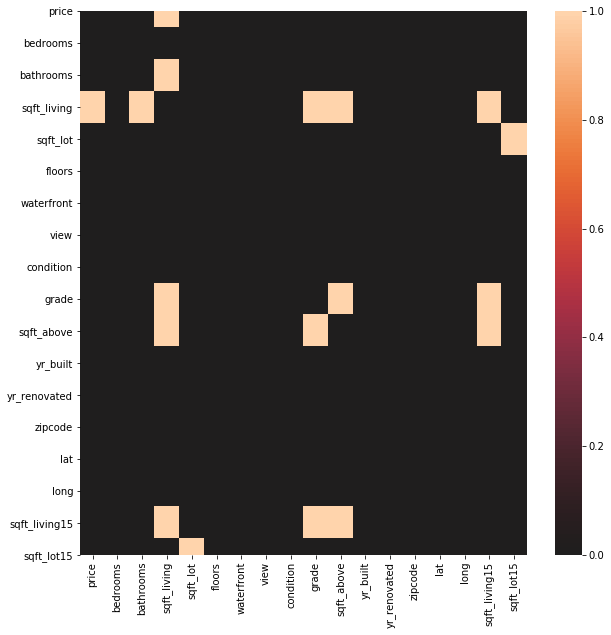

In [45]:
plt.figure(figsize = (10,10))
sns.heatmap((((df_subset1.corr() >= 0.7) | (df_subset1.corr() <= -0.7)) & (df_subset1.corr() != 1)), center=0)

In [46]:
display(df.head())
display(df.columns)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0,1955,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0,1933,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910,1965,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0,1987,1987,98074,47.6168,-122.045,1800,7503


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

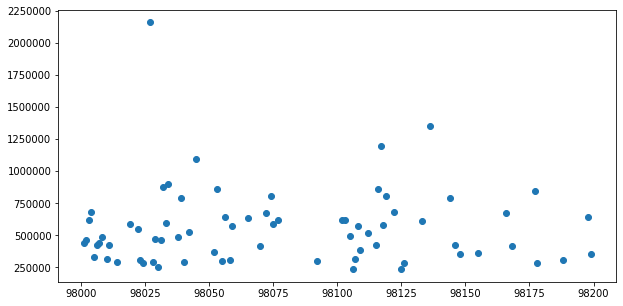

In [47]:
plt.figure(figsize = [10,5])
plt.scatter(df['zipcode'].astype("category").unique(), df.groupby('zipcode')['price'].mean())

In [48]:
df.groupby('zipcode')['price'].mean().sort_values(ascending = False).head(10)

zipcode
98039    2.161300e+06
98004    1.356524e+06
98040    1.194874e+06
98112    1.096239e+06
98102    8.996077e+05
98109    8.800778e+05
98105    8.632289e+05
98006    8.599386e+05
98119    8.497148e+05
98005    8.102897e+05
Name: price, dtype: float64

Given how different pricing v expensive houses in the city is vs pricing cheap houses in the suburbs is, we think it is smart to split our model up. Splitting by postcode, by waterfront and by price is similar, as the 4 postcodes around the waterfront are also the 4 most expensive. We will try find a split which allows us to price better, and this is the first we will try!

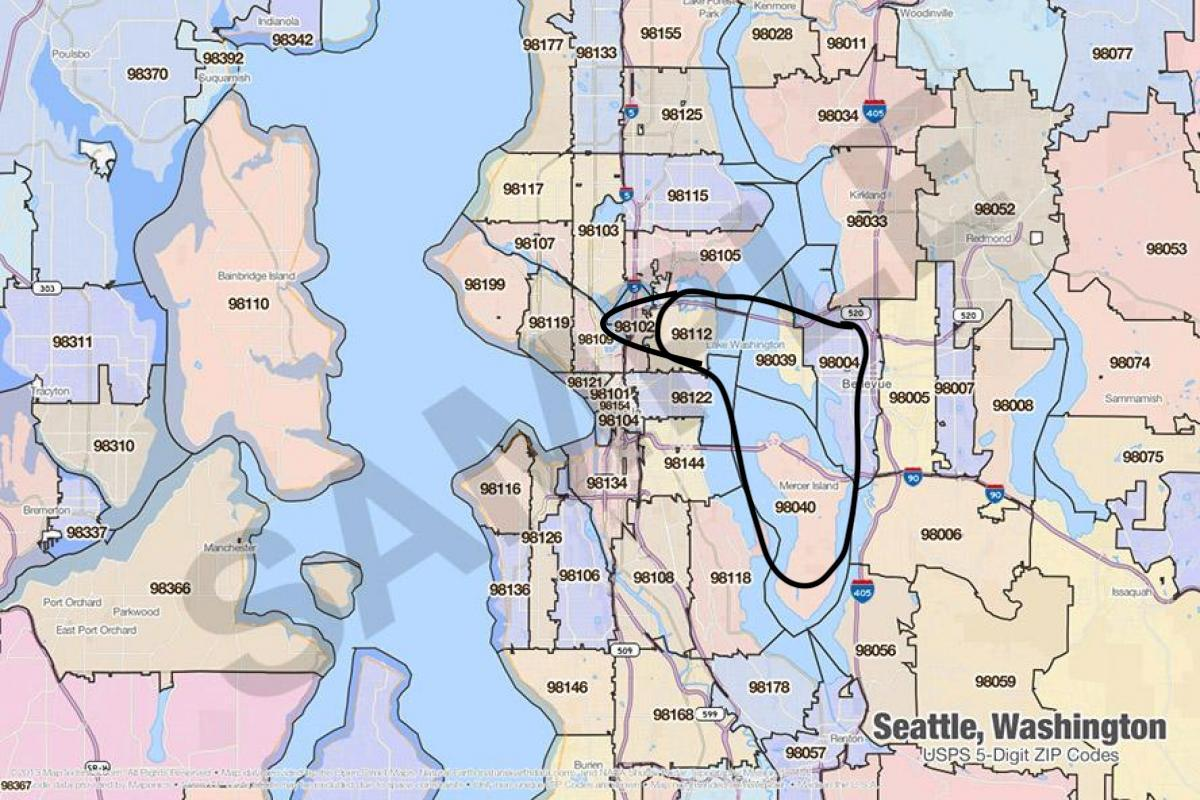

# Scaling and Normalisation

To be able to run a linear regression effecively, some of this data needs to be scaled and normalised.

In [49]:
#create a subset of predictors to be scaled or normalised
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

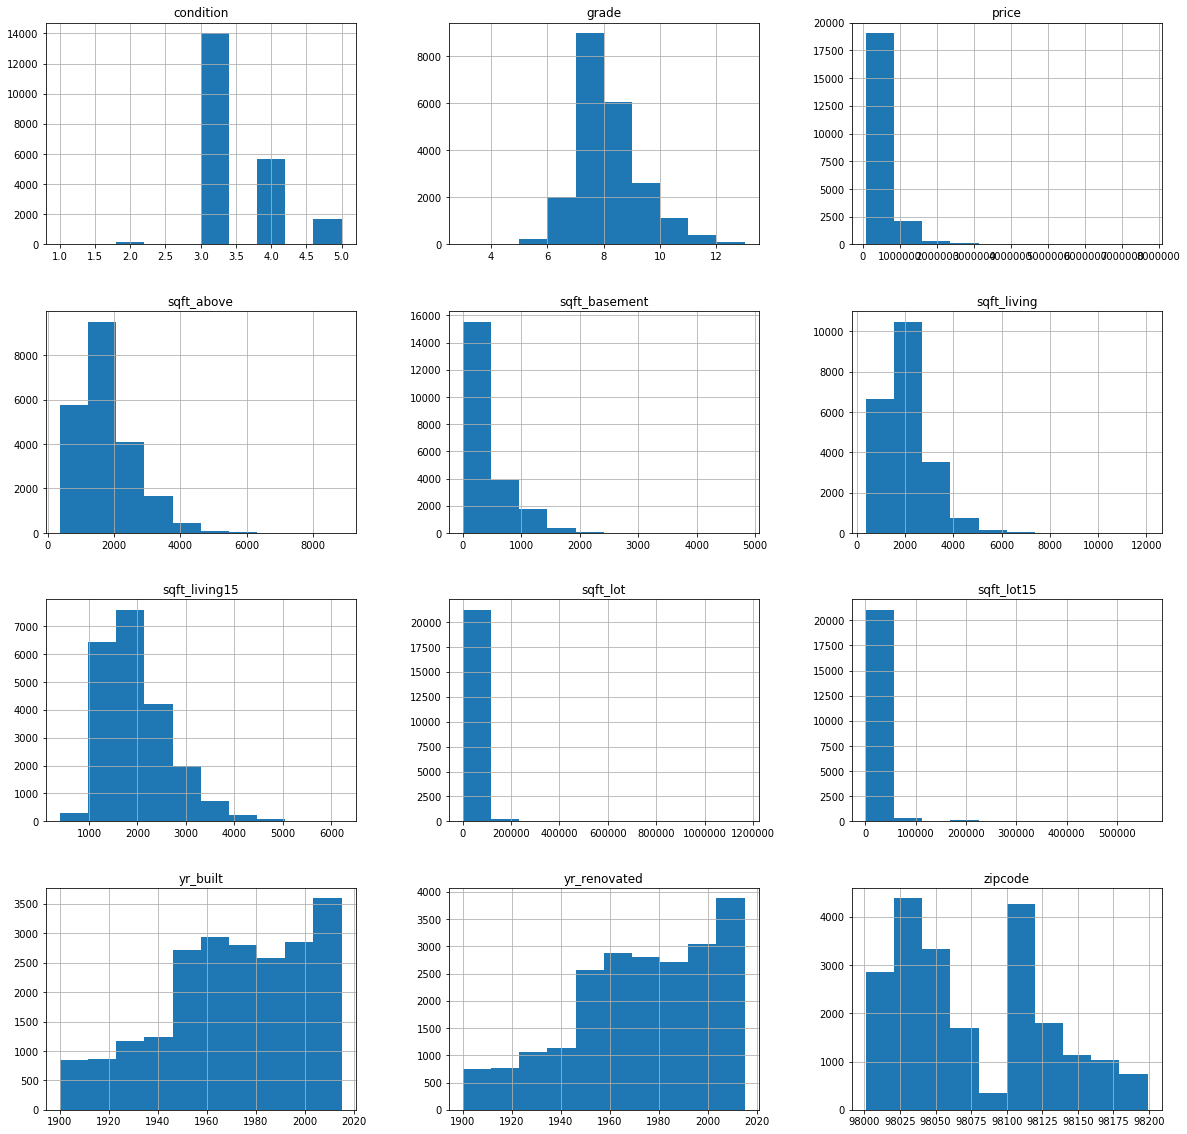

In [50]:
df_pred = df[['price','sqft_living','sqft_lot','condition', 'grade', 'sqft_above', 'sqft_basement',
              'yr_built', 'yr_renovated','date', 'zipcode','sqft_living15', 'sqft_lot15']]
df_pred.hist(column = ['price','sqft_living','sqft_lot','condition', 'grade', 'sqft_above', 'sqft_basement',
              'yr_built', 'yr_renovated','date', 'zipcode','sqft_living15', 'sqft_lot15'], figsize  = [20, 20])
plt.show()

In [51]:
df_pred.describe()

,price,sqft_living,sqft_lot,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,2.159200e+04,21592.000000,2.159200e+04,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000
mean,5.401453e+05,2079.369489,1.493117e+04,3.409874,7.657512,1787.858049,291.511439,1970.996388,1972.942293,98077.958457,1986.452436,12651.170341
std,3.671369e+05,913.974780,3.898092e+04,0.650585,1.172459,825.355762,441.791944,29.373587,28.943828,53.512216,684.925411,25825.978176
min,7.800000e+04,370.000000,5.200000e+02,1.000000,3.000000,370.000000,0.000000,1900.000000,1900.000000,98001.000000,399.000000,651.000000
25%,3.220000e+05,1430.000000,5.040000e+03,3.000000,7.000000,1190.000000,0.000000,1951.000000,1954.000000,98033.000000,1490.000000,5100.000000
50%,4.500000e+05,1910.000000,7.617000e+03,3.000000,7.000000,1560.000000,0.000000,1975.000000,1977.000000,98065.000000,1840.000000,7620.000000
75%,6.450000e+05,2550.000000,1.067975e+04,4.000000,8.000000,2210.000000,560.000000,1997.000000,1999.000000,98118.000000,2360.000000,10080.000000
max,7.700000e+06,12050.000000,1.164794e+06,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,560617.000000


In [52]:
#transform categorical predictor: yr_built, yr_renovated

In [53]:
display(df_pred["yr_built"].nunique(dropna = False))
display(df_pred["yr_built"].describe())

116

count    21592.000000
mean      1970.996388
std         29.373587
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [54]:
#yr_built_series = pd.Series(df_pred["yr_built"])
#cat_yr_built= yr_built_series.astype('category')

In [55]:
#from sklearn.preprocessing import LabelEncoder
#lb_make = LabelEncoder()
#yr_built_encoded = (lb_make.fit_transform(cat_yr_built)) + 1 #(add 1 so yr_built_scaled is > 0)
#yr_built_encoded

In [56]:
#replace column zipcode with zipcode encounded

In [57]:
df_pred["yr_built_scaled"] = df_pred["yr_built"].map(lambda x: x - 1899)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
df_pred.head(10)

,price,sqft_living,sqft_lot,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,date,zipcode,sqft_living15,sqft_lot15,yr_built_scaled
0,221900.0,1180,5650,3,7,1180,0,1955,1955,10/13/2014,98178,1340,5650,56
1,538000.0,2570,7242,3,7,2170,400,1951,1991,12/9/2014,98125,1690,7639,52
2,180000.0,770,10000,3,6,770,0,1933,1933,2/25/2015,98028,2720,8062,34
3,604000.0,1960,5000,5,7,1050,910,1965,1965,12/9/2014,98136,1360,5000,66
4,510000.0,1680,8080,3,8,1680,0,1987,1987,2/18/2015,98074,1800,7503,88
5,1230000.0,5420,101930,3,11,3890,1530,2001,2001,5/12/2014,98053,4760,101930,102
6,257500.0,1715,6819,3,7,1715,0,1995,1995,6/27/2014,98003,2238,6819,96
7,291850.0,1060,9711,3,7,1060,0,1963,1963,1/15/2015,98198,1650,9711,64
8,229500.0,1780,7470,3,7,1050,730,1960,1960,4/15/2015,98146,1780,8113,61
9,323000.0,1890,6560,3,7,1890,0,2003,2003,3/12/2015,98038,2390,7570,104


In [59]:
# display(df_pred["yr_renovated"].nunique(dropna = False))
# display(df_pred["yr_renovated"].describe())

In [60]:
# from sklearn.preprocessing import LabelEncoder
# lb_make = LabelEncoder()
# yr_renovated_encoded = (lb_make.fit_transform(cat_yr_built)) + 1#(add 1 so yr_renovated_scaled is > 0)
# yr_renovated_encoded

In [61]:
df_pred['yr_renovated_scaled'] = df_pred["yr_renovated"].map(lambda x: x - 1899)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
df_pred.tail(10)

,price,sqft_living,sqft_lot,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,date,zipcode,sqft_living15,sqft_lot15,yr_built_scaled,yr_renovated_scaled
21587,507250.0,2270,5536,3,8,2270,0,2003,2003,8/25/2014,98065,2270,5731,104,104
21588,429000.0,1490,1126,3,8,1490,0,2014,2014,1/26/2015,98144,1400,1230,115,115
21589,610685.0,2520,6023,3,9,2520,0,2014,2014,10/14/2014,98056,2520,6023,115,115
21590,1010000.0,3510,7200,3,9,2600,910,2009,2009,3/26/2015,98136,2050,6200,110,110
21591,475000.0,1310,1294,3,8,1180,130,2008,2008,2/19/2015,98116,1330,1265,109,109
21592,360000.0,1530,1131,3,8,1530,0,2009,2009,5/21/2014,98103,1530,1509,110,110
21593,400000.0,2310,5813,3,8,2310,0,2014,2014,2/23/2015,98146,1830,7200,115,115
21594,402101.0,1020,1350,3,7,1020,0,2009,2009,6/23/2014,98144,1020,2007,110,110
21595,400000.0,1600,2388,3,8,1600,0,2004,2004,1/16/2015,98027,1410,1287,105,105
21596,325000.0,1020,1076,3,7,1020,0,2008,2008,10/15/2014,98144,1020,1357,109,109


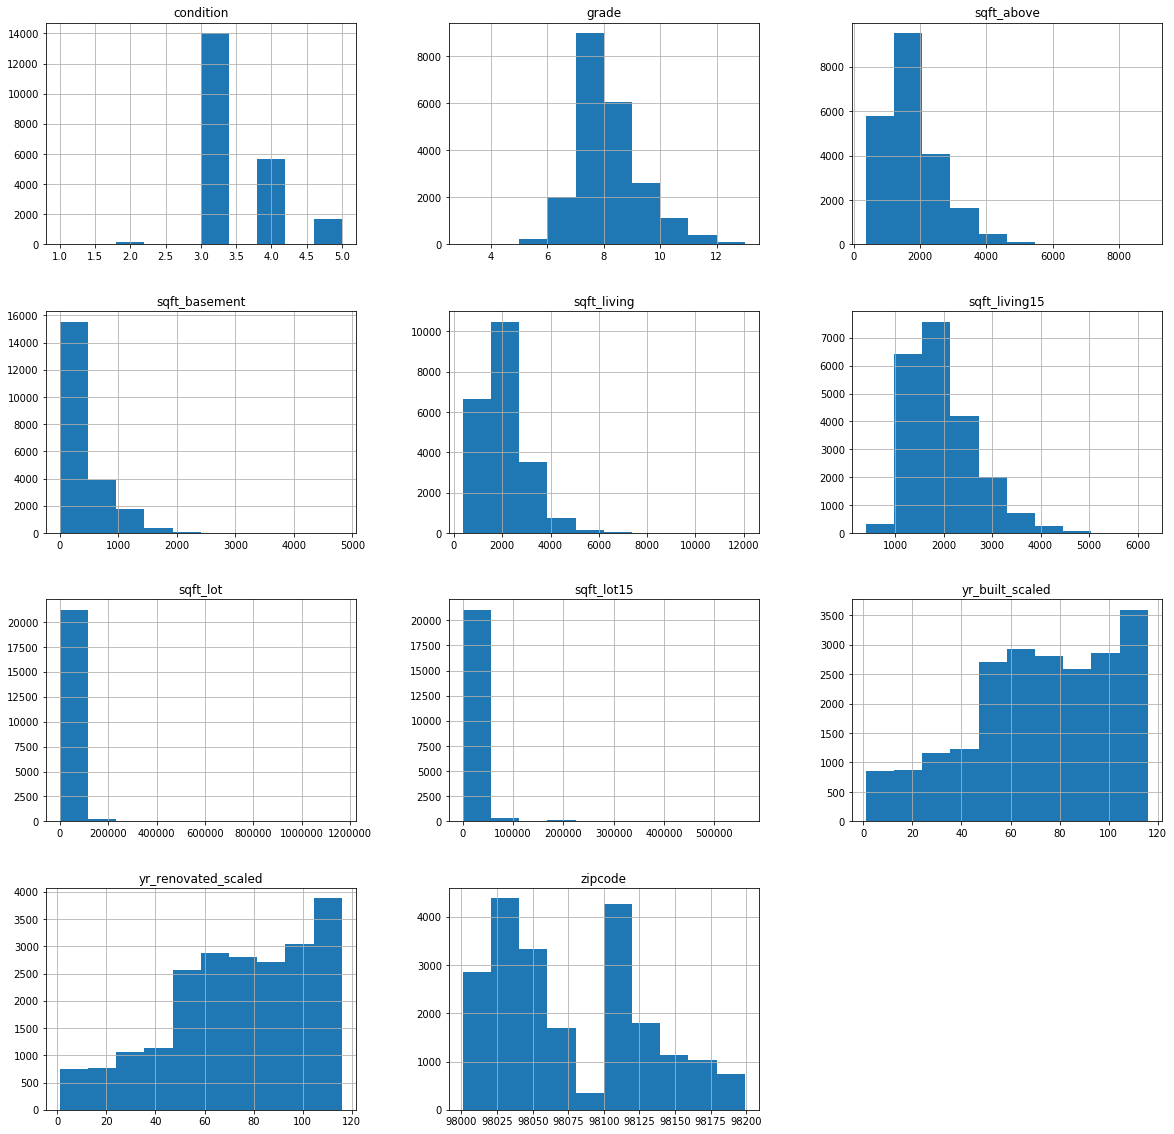

In [63]:
df_pred[['sqft_living','sqft_lot','condition', 'grade', 'sqft_above', 'sqft_basement',
              'yr_built_scaled', 'yr_renovated_scaled', 'zipcode','sqft_living15', 'sqft_lot15']].hist(figsize  = [20, 20])
plt.show()

In [64]:
#normalise predictors by taking the log

for x in ['price','sqft_living', 'sqft_lot','sqft_living15', 'sqft_lot15']:
     df_pred[x+"_log"] = df_pred[x].map(lambda x: np.log(x))
df_pred.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,price,sqft_living,sqft_lot,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,date,zipcode,sqft_living15,sqft_lot15,yr_built_scaled,yr_renovated_scaled,price_log,sqft_living_log,sqft_lot_log,sqft_living15_log,sqft_lot15_log
0,221900.0,1180,5650,3,7,1180,0,1955,1955,10/13/2014,98178,1340,5650,56,56,12.309982,7.073270,8.639411,7.200425,8.639411
1,538000.0,2570,7242,3,7,2170,400,1951,1991,12/9/2014,98125,1690,7639,52,92,13.195614,7.851661,8.887653,7.432484,8.941022
2,180000.0,770,10000,3,6,770,0,1933,1933,2/25/2015,98028,2720,8062,34,34,12.100712,6.646391,9.210340,7.908387,8.994917
3,604000.0,1960,5000,5,7,1050,910,1965,1965,12/9/2014,98136,1360,5000,66,66,13.311329,7.580700,8.517193,7.215240,8.517193
4,510000.0,1680,8080,3,8,1680,0,1987,1987,2/18/2015,98074,1800,7503,88,88,13.142166,7.426549,8.997147,7.495542,8.923058


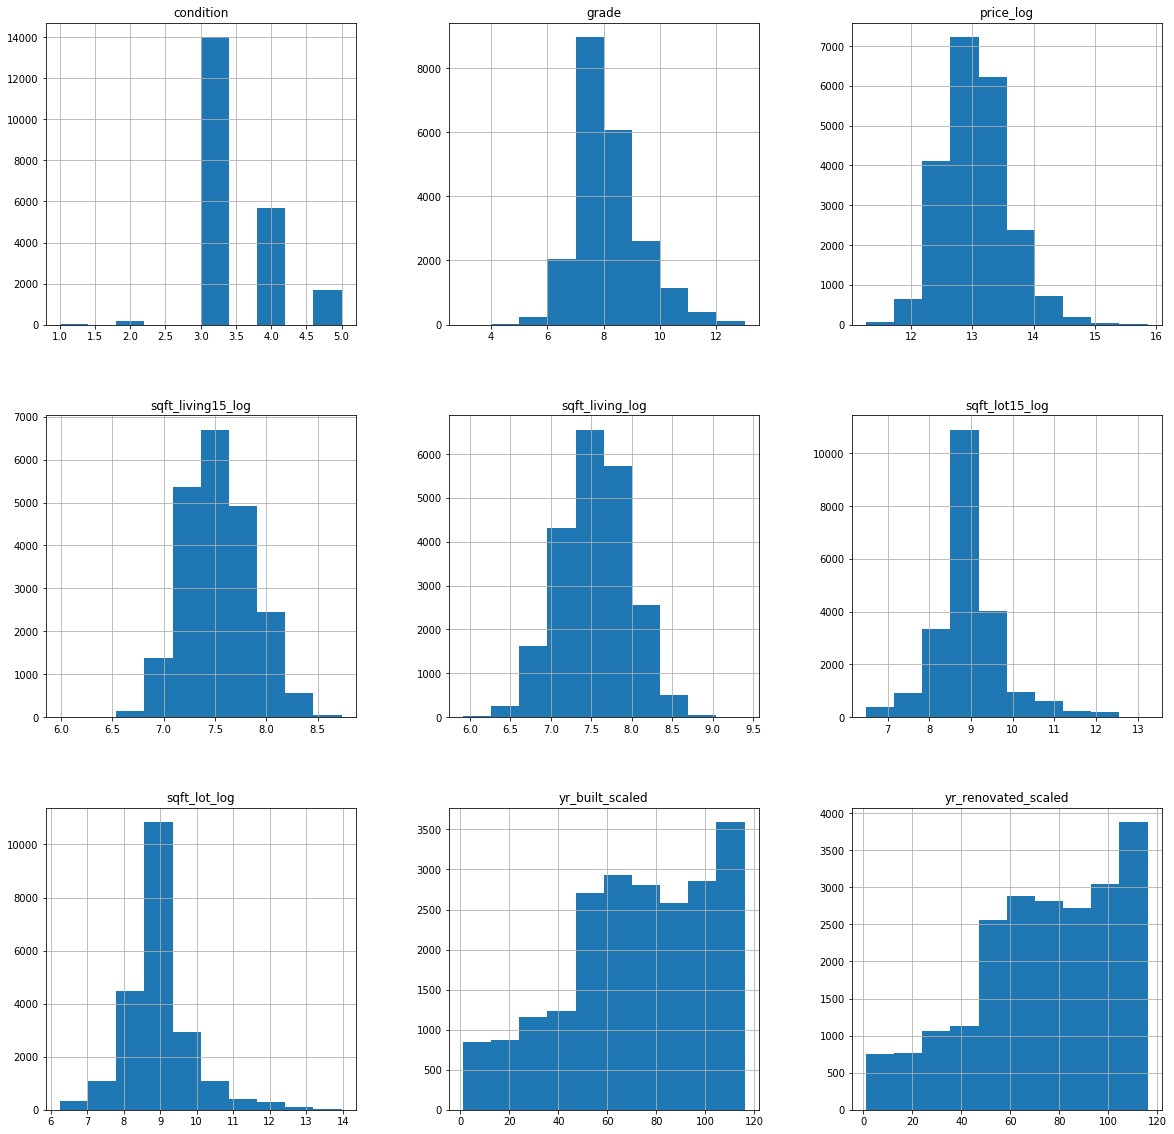

In [65]:
df_pred[['price_log','sqft_living_log','sqft_lot_log','condition', 'grade','yr_built_scaled', 'yr_renovated_scaled','sqft_living15_log', 'sqft_lot15_log']].hist(figsize  = [20, 20])
plt.show()

In [66]:
display(df_pred.groupby(df_pred['zipcode']).grade.apply(lambda x: x.mean()).head())
display(df_pred.groupby(df_pred['zipcode']).grade.apply(lambda x: x.mode()[0]).head())

display(df_pred.groupby(df_pred['zipcode']).condition.apply(lambda x: x.mean()).head())
display(df_pred.groupby(df_pred['zipcode']).condition.apply(lambda x: x.mode()[0]).head())

zipcode
98001    7.296399
98002    6.693467
98003    7.542857
98004    8.687697
98005    8.488095
Name: grade, dtype: float64

zipcode
98001    7
98002    7
98003    7
98004    8
98005    8
Name: grade, dtype: int64

zipcode
98001    3.335180
98002    3.743719
98003    3.371429
98004    3.495268
98005    3.696429
Name: condition, dtype: float64

zipcode
98001    3
98002    4
98003    3
98004    3
98005    4
Name: condition, dtype: int64

In [67]:
#add mean and mode grade per zipcode

mode_grade = df_pred.groupby(df_pred['zipcode']).grade.apply(lambda x: x.mode()[0])
mean_grade = df_pred.groupby(df_pred['zipcode']).grade.apply(lambda x: x.mean())

#add mean and mode condition per zipcode

mean_condition = df_pred.groupby(df_pred['zipcode']).condition.apply(lambda x: x.mean())
mode_condition = df_pred.groupby(df_pred['zipcode']).condition.apply(lambda x: x.mode()[0])


df_zipcode = pd.DataFrame({'zipcode': df_pred.groupby(df_pred['zipcode']).grade.apply(lambda x: x.mode()[0]).index,
                           'mean_grade_per_zipcode': mean_grade,
                           'mode_grade_per_zipcode': mode_grade,
                           'mean_condition_per_zipcode': mean_condition,
                           'mode_condition_per_zipcode': mode_condition,})
df_zipcode.drop(columns = "zipcode", axis = 1, inplace = True)
df_zipcode

,mean_grade_per_zipcode,mode_grade_per_zipcode,mean_condition_per_zipcode,mode_condition_per_zipcode
zipcode,,,,
98001,7.296399,7,3.335180,3
98002,6.693467,7,3.743719,4
98003,7.542857,7,3.371429,3
98004,8.687697,8,3.495268,3
98005,8.488095,8,3.696429,4
...,...,...,...,...
98177,7.976471,8,3.494118,3
98178,6.816794,7,3.320611,3
98188,7.036765,7,3.330882,3


In [68]:
import datetime
df_pred['date_formatted'] = pd.to_datetime(df_pred['date'])
df_pred['yr_sold'] = df_pred['date_formatted'].dt.year
df_pred.head()

,price,sqft_living,sqft_lot,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,date,...,sqft_lot15,yr_built_scaled,yr_renovated_scaled,price_log,sqft_living_log,sqft_lot_log,sqft_living15_log,sqft_lot15_log,date_formatted,yr_sold
0,221900.0,1180,5650,3,7,1180,0,1955,1955,10/13/2014,...,5650,56,56,12.309982,7.073270,8.639411,7.200425,8.639411,2014-10-13,2014
1,538000.0,2570,7242,3,7,2170,400,1951,1991,12/9/2014,...,7639,52,92,13.195614,7.851661,8.887653,7.432484,8.941022,2014-12-09,2014
2,180000.0,770,10000,3,6,770,0,1933,1933,2/25/2015,...,8062,34,34,12.100712,6.646391,9.210340,7.908387,8.994917,2015-02-25,2015
3,604000.0,1960,5000,5,7,1050,910,1965,1965,12/9/2014,...,5000,66,66,13.311329,7.580700,8.517193,7.215240,8.517193,2014-12-09,2014
4,510000.0,1680,8080,3,8,1680,0,1987,1987,2/18/2015,...,7503,88,88,13.142166,7.426549,8.997147,7.495542,8.923058,2015-02-18,2015


In [69]:
df_pred['age_yr_sold'] = df_pred['yr_sold'] - df_pred['yr_built']

df_pred.head()

,price,sqft_living,sqft_lot,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,date,...,yr_built_scaled,yr_renovated_scaled,price_log,sqft_living_log,sqft_lot_log,sqft_living15_log,sqft_lot15_log,date_formatted,yr_sold,age_yr_sold
0,221900.0,1180,5650,3,7,1180,0,1955,1955,10/13/2014,...,56,56,12.309982,7.073270,8.639411,7.200425,8.639411,2014-10-13,2014,59
1,538000.0,2570,7242,3,7,2170,400,1951,1991,12/9/2014,...,52,92,13.195614,7.851661,8.887653,7.432484,8.941022,2014-12-09,2014,63
2,180000.0,770,10000,3,6,770,0,1933,1933,2/25/2015,...,34,34,12.100712,6.646391,9.210340,7.908387,8.994917,2015-02-25,2015,82
3,604000.0,1960,5000,5,7,1050,910,1965,1965,12/9/2014,...,66,66,13.311329,7.580700,8.517193,7.215240,8.517193,2014-12-09,2014,49
4,510000.0,1680,8080,3,8,1680,0,1987,1987,2/18/2015,...,88,88,13.142166,7.426549,8.997147,7.495542,8.923058,2015-02-18,2015,28


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1440x1440 with 0 Axes>

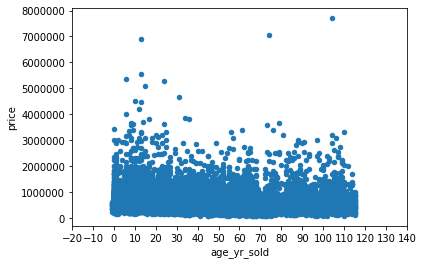

In [70]:
plt.figure(figsize = [20,20])
df_pred.plot.scatter('age_yr_sold','price')
plt.xticks(np.arange(-20, 150, step=10))
plt.show

In [71]:
df_pred["age_yr_sold"].value_counts().tail()

 113    28
 115    26
 81     23
 80     21
-1      12
Name: age_yr_sold, dtype: int64

In [72]:
df_pred.loc[df_pred["age_yr_sold"] < 0]
#ignore for now.  check vs original df.

,price,sqft_living,sqft_lot,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,date,...,yr_built_scaled,yr_renovated_scaled,price_log,sqft_living_log,sqft_lot_log,sqft_living15_log,sqft_lot15_log,date_formatted,yr_sold,age_yr_sold
1761,597326.0,3570,8250,3,10,2860,710,2015,2015,6/25/2014,...,116,116,13.300218,8.180321,9.017968,7.709757,9.210340,2014-06-25,2014,-1
2685,385195.0,710,6000,3,6,710,0,2015,2015,10/29/2014,...,116,116,12.861505,6.565265,8.699515,7.272398,8.476371,2014-10-29,2014,-1
7519,614285.0,2730,6401,3,8,2730,0,2015,2015,12/31/2014,...,116,116,13.328214,7.912057,8.764210,7.832014,8.720297,2014-12-31,2014,-1
8032,455000.0,1200,1259,3,8,1000,200,2015,2015,6/24/2014,...,116,116,13.028053,7.090077,7.138073,7.185387,7.524021,2014-06-24,2014,-1
14475,500000.0,1570,1269,3,9,1280,290,2015,2015,8/26/2014,...,116,116,13.122363,7.358831,7.145984,7.358831,8.699515,2014-08-26,2014,-1
17084,350000.0,1380,3600,3,8,1380,0,2015,2015,6/17/2014,...,116,116,12.765688,7.229839,8.188689,7.299797,8.188689,2014-06-17,2014,-1
19789,455000.0,1320,1014,3,9,1320,0,2015,2015,8/1/2014,...,116,116,13.028053,7.185387,6.921658,7.229839,7.309881,2014-08-01,2014,-1
20754,357000.0,2990,9240,3,8,2990,0,2015,2015,8/28/2014,...,116,116,12.785491,8.003029,9.131297,7.585789,9.804220,2014-08-28,2014,-1
20836,595000.0,3730,4560,3,9,2760,970,2015,2015,7/9/2014,...,116,116,13.296317,8.224164,8.425078,7.495542,8.425078,2014-07-09,2014,-1
20947,230000.0,1040,1264,3,9,900,140,2015,2015,7/31/2014,...,116,116,12.345835,6.946976,7.142037,7.207860,8.006368,2014-07-31,2014,-1


In [73]:
df_pred.drop(columns = ['sqft_living', 'sqft_lot', 'condition','grade', 'sqft_above',
                         'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
                         'sqft_lot15','price', 'date'], inplace = True)

df_pred.head()

,yr_built_scaled,yr_renovated_scaled,price_log,sqft_living_log,sqft_lot_log,sqft_living15_log,sqft_lot15_log,date_formatted,yr_sold,age_yr_sold
0,56,56,12.309982,7.073270,8.639411,7.200425,8.639411,2014-10-13,2014,59
1,52,92,13.195614,7.851661,8.887653,7.432484,8.941022,2014-12-09,2014,63
2,34,34,12.100712,6.646391,9.210340,7.908387,8.994917,2015-02-25,2015,82
3,66,66,13.311329,7.580700,8.517193,7.215240,8.517193,2014-12-09,2014,49
4,88,88,13.142166,7.426549,8.997147,7.495542,8.923058,2015-02-18,2015,28


In [74]:
df_final = pd.concat([df, df_pred], axis =1, join = 'outer') # add scaled / normalised predictors

In [75]:
df_final.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built_scaled,yr_renovated_scaled,price_log,sqft_living_log,sqft_lot_log,sqft_living15_log,sqft_lot15_log,date_formatted,yr_sold,age_yr_sold
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,56,56,12.309982,7.073270,8.639411,7.200425,8.639411,2014-10-13,2014,59
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,52,92,13.195614,7.851661,8.887653,7.432484,8.941022,2014-12-09,2014,63
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,34,34,12.100712,6.646391,9.210340,7.908387,8.994917,2015-02-25,2015,82
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,66,66,13.311329,7.580700,8.517193,7.215240,8.517193,2014-12-09,2014,49
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,88,88,13.142166,7.426549,8.997147,7.495542,8.923058,2015-02-18,2015,28


In [76]:
df_final = df_final.join(df_zipcode, on = "zipcode", how = "left") # add df_zipcode

In [77]:
df_final.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_lot_log,sqft_living15_log,sqft_lot15_log,date_formatted,yr_sold,age_yr_sold,mean_grade_per_zipcode,mode_grade_per_zipcode,mean_condition_per_zipcode,mode_condition_per_zipcode
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,8.639411,7.200425,8.639411,2014-10-13,2014,59,6.816794,7,3.320611,3
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,8.887653,7.432484,8.941022,2014-12-09,2014,63,7.176039,7,3.342298,3
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,9.210340,7.908387,8.994917,2015-02-25,2015,82,7.611307,7,3.300353,3
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,8.517193,7.215240,8.517193,2014-12-09,2014,49,7.403042,7,3.395437,3
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8.997147,7.495542,8.923058,2015-02-18,2015,28,8.709751,9,3.126984,3


In [78]:
#lets look at the age again

display(df_final.loc[df_final["age_yr_sold"] < 0]) #negative age

df_final[df_final.duplicated(subset=["id"], keep="first")] #resold properties

#check whether these properties were resold:
df_final.loc[df_final["age_yr_sold"] < 0].index.isin(df_final[df_final.duplicated(subset=["id"], keep="first")].index)

#these properties were not resold.  we can assume these were sold during the preselling period. \

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_lot_log,sqft_living15_log,sqft_lot15_log,date_formatted,yr_sold,age_yr_sold,mean_grade_per_zipcode,mode_grade_per_zipcode,mean_condition_per_zipcode,mode_condition_per_zipcode
1761,1832100030,6/25/2014,597326.0,4,4.00,3570,8250,2.0,0.0,0.0,...,9.017968,7.709757,9.210340,2014-06-25,2014,-1,8.960993,8,3.787234,4
2685,3076500830,10/29/2014,385195.0,1,1.00,710,6000,1.5,0.0,0.0,...,8.699515,7.272398,8.476371,2014-10-29,2014,-1,7.456140,7,3.505848,3
7519,9520900210,12/31/2014,614285.0,5,2.75,2730,6401,2.0,0.0,0.0,...,8.764210,7.832014,8.720297,2014-12-31,2014,-1,8.069597,7,3.307692,3
8032,1250200495,6/24/2014,455000.0,2,1.50,1200,1259,2.0,0.0,0.0,...,7.138073,7.185387,7.524021,2014-06-24,2014,-1,7.456140,7,3.505848,3
14475,2770601530,8/26/2014,500000.0,2,2.25,1570,1269,2.0,0.0,0.0,...,7.145984,7.358831,8.699515,2014-08-26,2014,-1,8.012618,7,3.507886,3
17084,9126100346,6/17/2014,350000.0,3,2.00,1380,3600,3.0,0.0,0.0,...,8.188689,7.299797,8.188689,2014-06-17,2014,-1,7.744828,8,3.306897,3
19789,9126100765,8/1/2014,455000.0,3,1.75,1320,1014,3.0,0.0,0.0,...,6.921658,7.229839,7.309881,2014-08-01,2014,-1,7.744828,8,3.306897,3
20754,9310300160,8/28/2014,357000.0,5,2.50,2990,9240,2.0,0.0,0.0,...,9.131297,7.585789,9.804220,2014-08-28,2014,-1,7.123732,7,3.541582,3
20836,1257201420,7/9/2014,595000.0,4,3.25,3730,4560,2.0,0.0,0.0,...,8.425078,7.495542,8.425078,2014-07-09,2014,-1,7.410299,7,3.483389,3
20947,6058600220,7/31/2014,230000.0,3,1.50,1040,1264,2.0,0.0,0.0,...,7.142037,7.207860,8.006368,2014-07-31,2014,-1,7.456140,7,3.505848,3


array([False, False, False, False, False, False, False, False, False,
       False, False, False])

In [79]:
#use 0 as a placeholder for age

def age_neg(x):
    if x["age_yr_sold"] < 0:
        return 0
    else:
        return x["age_yr_sold"]


df_final["age_yr_sold"] = df_final.apply(lambda x: age_neg(x), axis = 1)

df_final.loc[df_final["age_yr_sold"]< 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_lot_log,sqft_living15_log,sqft_lot15_log,date_formatted,yr_sold,age_yr_sold,mean_grade_per_zipcode,mode_grade_per_zipcode,mean_condition_per_zipcode,mode_condition_per_zipcode


In [80]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21592 entries, 0 to 21596
Data columns (total 35 columns):
id                            21592 non-null int64
date                          21592 non-null object
price                         21592 non-null float64
bedrooms                      21592 non-null int64
bathrooms                     21592 non-null float64
sqft_living                   21592 non-null int64
sqft_lot                      21592 non-null int64
floors                        21592 non-null float64
waterfront                    21592 non-null float64
view                          21592 non-null float64
condition                     21592 non-null int64
grade                         21592 non-null int64
sqft_above                    21592 non-null int64
sqft_basement                 21592 non-null int64
yr_built                      21592 non-null int64
yr_renovated                  21592 non-null int64
zipcode                       21592 non-null int64
lat          

In [81]:
df_working = df_final[['id', 'zipcode','waterfront', 'view', 'condition', 'grade','lat', 'long', 'yr_built_scaled',
                       'yr_renovated_scaled', 'price_log', 'sqft_living_log', 'sqft_lot_log',
                       'sqft_living15_log', 'sqft_lot15_log','age_yr_sold', 'mean_grade_per_zipcode',
                       'mode_grade_per_zipcode','mean_condition_per_zipcode', 'mode_condition_per_zipcode']]

df_working.head()

,id,zipcode,waterfront,view,condition,grade,lat,long,yr_built_scaled,yr_renovated_scaled,price_log,sqft_living_log,sqft_lot_log,sqft_living15_log,sqft_lot15_log,age_yr_sold,mean_grade_per_zipcode,mode_grade_per_zipcode,mean_condition_per_zipcode,mode_condition_per_zipcode
0,7129300520,98178,0.0,0.0,3,7,47.5112,-122.257,56,56,12.309982,7.073270,8.639411,7.200425,8.639411,59,6.816794,7,3.320611,3
1,6414100192,98125,0.0,0.0,3,7,47.7210,-122.319,52,92,13.195614,7.851661,8.887653,7.432484,8.941022,63,7.176039,7,3.342298,3
2,5631500400,98028,0.0,0.0,3,6,47.7379,-122.233,34,34,12.100712,6.646391,9.210340,7.908387,8.994917,82,7.611307,7,3.300353,3
3,2487200875,98136,0.0,0.0,5,7,47.5208,-122.393,66,66,13.311329,7.580700,8.517193,7.215240,8.517193,49,7.403042,7,3.395437,3
4,1954400510,98074,0.0,0.0,3,8,47.6168,-122.045,88,88,13.142166,7.426549,8.997147,7.495542,8.923058,28,8.709751,9,3.126984,3


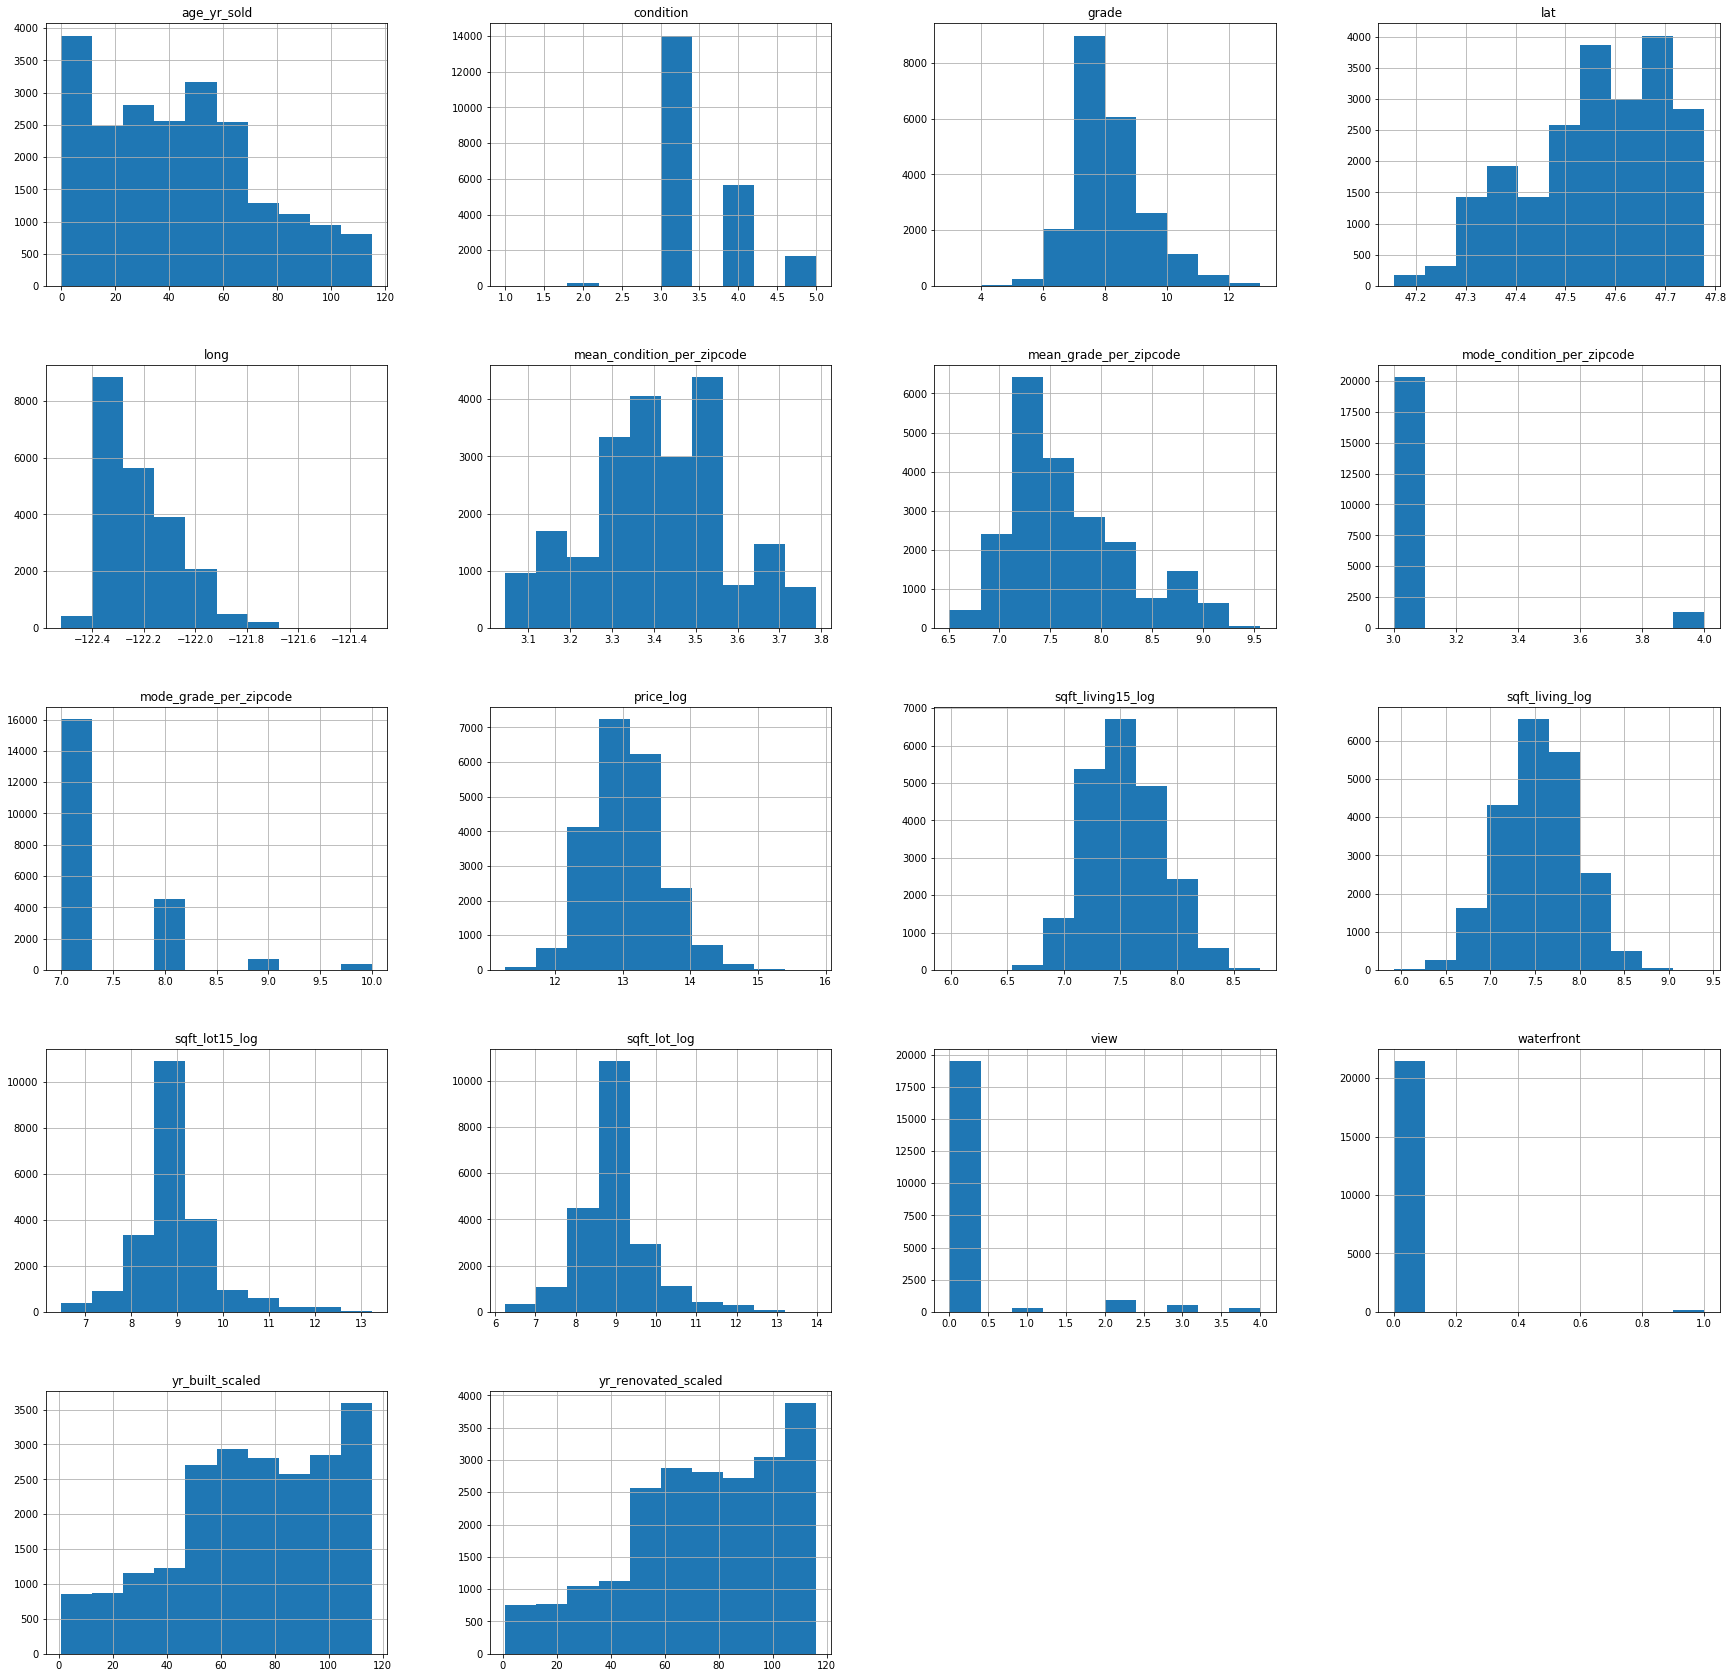

In [82]:
df_working[['waterfront', 'view', 'condition', 'grade','lat', 'long', 'yr_built_scaled','yr_renovated_scaled',
           'price_log', 'sqft_living_log', 'sqft_lot_log', 'sqft_living15_log', 'sqft_lot15_log','age_yr_sold',
           'mean_grade_per_zipcode','mode_grade_per_zipcode','mean_condition_per_zipcode', 'mode_condition_per_zipcode']].hist(figsize = [30,30])
plt.show()

# Models


## Universal Model


In [83]:
df_working.columns

Index(['id', 'zipcode', 'waterfront', 'view', 'condition', 'grade', 'lat',
       'long', 'yr_built_scaled', 'yr_renovated_scaled', 'price_log',
       'sqft_living_log', 'sqft_lot_log', 'sqft_living15_log',
       'sqft_lot15_log', 'age_yr_sold', 'mean_grade_per_zipcode',
       'mode_grade_per_zipcode', 'mean_condition_per_zipcode',
       'mode_condition_per_zipcode'],
      dtype='object')

In [105]:
df_working[['price_log','sqft_living_log', 'sqft_lot_log', 'sqft_living15_log',
       'sqft_lot15_log','waterfront', 'view', 'condition', 'grade', 'lat',
       'long', 'yr_built_scaled', 'yr_renovated_scaled', 'age_yr_sold', 'mean_grade_per_zipcode',
       'mode_grade_per_zipcode', 'mean_condition_per_zipcode',
       'mode_condition_per_zipcode']].corr()

,price_log,sqft_living_log,sqft_lot_log,sqft_living15_log,sqft_lot15_log,waterfront,view,condition,grade,lat,long,yr_built_scaled,yr_renovated_scaled,age_yr_sold,mean_grade_per_zipcode,mode_grade_per_zipcode,mean_condition_per_zipcode,mode_condition_per_zipcode
price_log,1.000000,0.674613,0.136982,0.607173,0.122325,0.170816,0.344077,0.039097,0.703569,0.448937,0.050218,0.080356,0.121842,-0.080278,0.567191,0.401540,0.105689,0.073923
sqft_living_log,0.674613,1.000000,0.325170,0.747214,0.302042,0.079015,0.244118,-0.049285,0.742762,0.038380,0.256694,0.349431,0.370149,-0.349888,0.405658,0.299556,-0.045803,0.054747
sqft_lot_log,0.136982,0.325170,1.000000,0.363789,0.918308,0.072594,0.119764,0.074045,0.183223,-0.149448,0.375433,-0.007567,-0.012338,0.007423,0.176762,0.140384,-0.072643,0.105767
sqft_living15_log,0.607173,0.747214,0.363789,1.000000,0.373717,0.076543,0.262227,-0.089249,0.689261,0.043602,0.337981,0.333945,0.332334,-0.334262,0.518914,0.387252,-0.078499,0.060027
sqft_lot15_log,0.122325,0.302042,0.918308,0.373717,1.000000,0.081844,0.117222,0.080295,0.183669,-0.143952,0.376189,0.018427,0.013908,-0.018567,0.187717,0.150654,-0.065027,0.116192
waterfront,0.170816,0.079015,0.072594,0.076543,0.081844,1.000000,0.380961,0.016642,0.082909,-0.012158,-0.037615,-0.024482,-0.006884,0.024400,0.003879,0.011630,0.042617,0.073511
view,0.344077,0.244118,0.119764,0.262227,0.117222,0.380961,1.000000,0.045711,0.248635,0.006484,-0.078637,-0.054549,-0.026665,0.054561,0.040341,0.023560,0.105999,0.051925
condition,0.039097,-0.049285,0.074045,-0.089249,0.080295,0.016642,0.045711,1.000000,-0.146696,-0.014930,-0.105812,-0.361480,-0.390160,0.360722,-0.014746,-0.054608,0.254599,0.114907
grade,0.703569,0.742762,0.183223,0.689261,0.183669,0.082909,0.248635,-0.146696,1.000000,0.113188,0.199734,0.447712,0.459204,-0.448171,0.484738,0.382405,-0.028075,0.041190
lat,0.448937,0.038380,-0.149448,0.043602,-0.143952,-0.012158,0.006484,-0.014930,0.113188,1.000000,-0.135522,-0.148742,-0.137817,0.148286,0.231304,0.168938,-0.044835,-0.082858


In [132]:
formula = "price_log~sqft_living_log+grade+mean_grade_per_zipcode+view"
model = ols(formula = formula, data = df_working).fit()
display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     9487.
Date:                Tue, 22 Oct 2019   Prob (F-statistic):               0.00
Time:                        16:48:11   Log-Likelihood:                -5829.9
No. Observations:               21592   AIC:                         1.167e+04
Df Residuals:                   21587   BIC:                         1.171e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  7.2036      0.050    145.146      0.000       7.106       7.301
sqft_living_log            0.3526      0.008     46.003      0.000       0.338       0.368
grade                      0.1353      0.003     46.579      0.000       0.130       0.141
mean_grade_per_zipcode     0.2764      0.004     63.147      0.000       0.268       0.285
view                       0.1294      0.003     43.965      0.000       0.124       0.135
==============================================================================
Omnibus:                       64.046   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.905
Skew:                           0.118   Prob(JB):                     2.19e-14
Kurtosis:                       2.882   Cond. No.                         308.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
df_working[["price_log","sqft_living_log","grade","view","mean_grade_per_zipcode"]].corr()

,price_log,sqft_living_log,grade,view,mean_grade_per_zipcode
price_log,1.000000,0.674613,0.703569,0.344077,0.567191
sqft_living_log,0.674613,1.000000,0.742762,0.244118,0.405658
grade,0.703569,0.742762,1.000000,0.248635,0.484738
view,0.344077,0.244118,0.248635,1.000000,0.040341
mean_grade_per_zipcode,0.567191,0.405658,0.484738,0.040341,1.000000


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


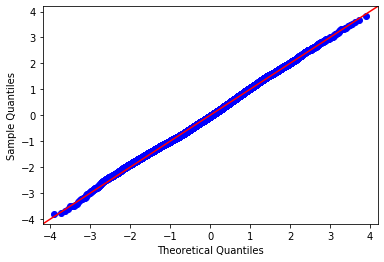

In [134]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

## Model in the Waterfront Properties

In [136]:
#2 subsets

df_working1 = df_working.loc[(df_working["zipcode"] == 98039) 
                         | (df_working["zipcode"] == 98004)
                         | (df_working["zipcode"] == 98040)
                         | (df_working["zipcode"] == 98112)
                         | (df_working["zipcode"] == 98102)]

df_working1["zipcode"].unique()

array([98040, 98112, 98004, 98102, 98039])

In [139]:
df_working1[['price_log','sqft_living_log', 'sqft_lot_log', 'sqft_living15_log',
       'sqft_lot15_log','waterfront', 'view', 'condition', 'grade', 'lat',
       'long', 'yr_built_scaled', 'yr_renovated_scaled', 'age_yr_sold', 'mean_grade_per_zipcode',
       'mode_grade_per_zipcode', 'mean_condition_per_zipcode',
       'mode_condition_per_zipcode']].corr()

,price_log,sqft_living_log,sqft_lot_log,sqft_living15_log,sqft_lot15_log,waterfront,view,condition,grade,lat,long,yr_built_scaled,yr_renovated_scaled,age_yr_sold,mean_grade_per_zipcode,mode_grade_per_zipcode,mean_condition_per_zipcode,mode_condition_per_zipcode
price_log,1.000000,0.841153,0.554857,0.676752,0.536637,0.238951,0.387878,0.050133,0.763285,-0.004254,0.258057,0.221231,0.271213,-0.220199,0.312414,0.264594,0.051578,0.008477
sqft_living_log,0.841153,1.000000,0.550350,0.661205,0.507936,0.140245,0.326653,0.038518,0.777852,-0.168285,0.261518,0.232777,0.270954,-0.232559,0.309718,0.149225,0.207965,0.175934
sqft_lot_log,0.554857,0.550350,1.000000,0.691765,0.928025,0.105847,0.299758,0.187109,0.352608,-0.395901,0.699280,0.068247,0.097765,-0.067807,0.628203,0.200859,0.413107,0.357352
sqft_living15_log,0.676752,0.661205,0.691765,1.000000,0.711098,0.155340,0.410288,0.176300,0.544681,-0.270728,0.378046,0.082586,0.113323,-0.082147,0.416134,0.155045,0.306702,0.271378
sqft_lot15_log,0.536637,0.507936,0.928025,0.711098,1.000000,0.131263,0.300873,0.195911,0.339358,-0.401923,0.731235,0.135348,0.159780,-0.134899,0.661506,0.222016,0.421737,0.359238
waterfront,0.238951,0.140245,0.105847,0.155340,0.131263,1.000000,0.368602,0.045299,0.113545,-0.106816,0.056076,0.011055,0.023588,-0.011036,0.108281,0.014734,0.139396,0.144805
view,0.387878,0.326653,0.299758,0.410288,0.300873,0.368602,1.000000,0.034563,0.299220,-0.228702,0.125441,0.078748,0.108137,-0.078870,0.201432,0.014087,0.248692,0.256005
condition,0.050133,0.038518,0.187109,0.176300,0.195911,0.045299,0.034563,1.000000,-0.053813,-0.175148,0.073415,-0.292246,-0.354270,0.291589,0.114386,-0.028848,0.202064,0.194084
grade,0.763285,0.777852,0.352608,0.544681,0.339358,0.113545,0.299220,-0.053813,1.000000,-0.120959,0.137406,0.430292,0.417120,-0.430329,0.216896,0.141607,0.122783,0.116479
lat,-0.004254,-0.168285,-0.395901,-0.270728,-0.401923,-0.106816,-0.228702,-0.175148,-0.120959,1.000000,-0.467684,-0.237732,-0.208544,0.237933,-0.531995,0.131173,-0.849121,-0.862526


In [143]:
formula = "price_log~sqft_living_log+grade+waterfront+mean_grade_per_zipcode"
model = ols(formula = formula, data = df_working).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     8760.
Date:                Tue, 22 Oct 2019   Prob (F-statistic):               0.00
Time:                        16:53:15   Log-Likelihood:                -6370.5
No. Observations:               21592   AIC:                         1.275e+04
Df Residuals:                   21587   BIC:                         1.279e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  7.0359      0.051    138.810      0.000       6.937       7.135
sqft_living_log            0.3797      0.008     48.543      0.000       0.364       0.395
grade                      0.1479      0.003     50.029      0.000       0.142       0.154
waterfront                 0.7595      0.027     28.004      0.000       0.706       0.813
mean_grade_per_zipcode     0.2621      0.004     58.665      0.000       0.253       0.271
==============================================================================
Omnibus:                      127.390   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.048
Skew:                           0.173   Prob(JB):                     4.26e-28
Kurtosis:                       2.856   Cond. No.                         307.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [144]:
df_working[["price_log","sqft_living_log","grade","waterfront","mean_grade_per_zipcode"]].corr()

,price_log,sqft_living_log,grade,waterfront,mean_grade_per_zipcode
price_log,1.000000,0.674613,0.703569,0.170816,0.567191
sqft_living_log,0.674613,1.000000,0.742762,0.079015,0.405658
grade,0.703569,0.742762,1.000000,0.082909,0.484738
waterfront,0.170816,0.079015,0.082909,1.000000,0.003879
mean_grade_per_zipcode,0.567191,0.405658,0.484738,0.003879,1.000000


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


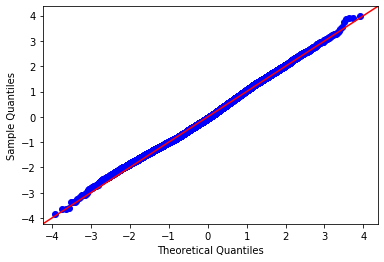

In [146]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

## Model in the not Waterfront postcodes

In [93]:
df_working2 = df_working.loc[(df_working["zipcode"] != 98039) 
                         & (df_working["zipcode"] != 98004)
                         & (df_working["zipcode"] != 98040)
                         & (df_working["zipcode"] != 98112)
                         & (df_working["zipcode"] != 98102)]

(df_working2["zipcode"].unique())

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98092, 98030, 98119, 98052, 98027, 98117, 98058, 98001, 98056,
       98166, 98023, 98070, 98148, 98105, 98042, 98008, 98059, 98122,
       98144, 98005, 98034, 98075, 98116, 98010, 98118, 98199, 98032,
       98045, 98077, 98108, 98168, 98177, 98065, 98029, 98006, 98109,
       98022, 98033, 98155, 98024, 98011, 98031, 98106, 98072, 98188,
       98014, 98055])

In [94]:
df_working2[['price_log','sqft_living_log', 'sqft_lot_log', 'sqft_living15_log',
       'sqft_lot15_log','waterfront', 'view', 'condition', 'grade', 'lat',
       'long', 'yr_built_scaled', 'yr_renovated_scaled', 'age_yr_sold', 'mean_grade_per_zipcode',
       'mode_grade_per_zipcode', 'mean_condition_per_zipcode',
       'mode_condition_per_zipcode']].corr()

,price_log,sqft_living_log,sqft_lot_log,sqft_living15_log,sqft_lot15_log,waterfront,view,condition,grade,lat,long,yr_built_scaled,yr_renovated_scaled,age_yr_sold,mean_grade_per_zipcode,mode_grade_per_zipcode,mean_condition_per_zipcode,mode_condition_per_zipcode
price_log,1.000000,0.662485,0.129154,0.585886,0.109412,0.173137,0.350436,0.019452,0.687600,0.465420,0.072947,0.105377,0.141041,-0.105277,0.500772,0.346379,0.030991,0.001523
sqft_living_log,0.662485,1.000000,0.318991,0.744625,0.294708,0.072855,0.234852,-0.064099,0.732869,0.030267,0.272786,0.372323,0.388726,-0.372791,0.384722,0.277821,-0.095189,0.008352
sqft_lot_log,0.129154,0.318991,1.000000,0.356594,0.917979,0.071047,0.110642,0.068956,0.178772,-0.148815,0.374457,-0.011202,-0.017756,0.011028,0.183633,0.145630,-0.092614,0.089134
sqft_living15_log,0.585886,0.744625,0.356594,1.000000,0.364210,0.069740,0.250288,-0.115471,0.686281,0.034351,0.357878,0.366817,0.359532,-0.367136,0.499037,0.364410,-0.140366,0.000424
sqft_lot15_log,0.109412,0.294708,0.917979,0.364210,1.000000,0.079134,0.107270,0.074461,0.177739,-0.143890,0.375414,0.013491,0.007140,-0.013660,0.190602,0.153578,-0.087325,0.098252
waterfront,0.173137,0.072855,0.071047,0.069740,0.079134,1.000000,0.381954,0.013621,0.078679,-0.012310,-0.039852,-0.026146,-0.008497,0.026058,-0.007447,0.007689,0.034397,0.061992
view,0.350436,0.234852,0.110642,0.250288,0.107270,0.381954,1.000000,0.044046,0.241080,0.006646,-0.081831,-0.060550,-0.033845,0.060575,0.018794,0.012788,0.091485,0.018350
condition,0.019452,-0.064099,0.068956,-0.115471,0.074461,0.013621,0.044046,1.000000,-0.167906,-0.017427,-0.107560,-0.363135,-0.390778,0.362373,-0.045553,-0.073097,0.251533,0.098961
grade,0.687600,0.732869,0.178772,0.686281,0.177739,0.078679,0.241080,-0.167906,1.000000,0.106094,0.220810,0.473755,0.482233,-0.474210,0.463651,0.359971,-0.083968,-0.012655
lat,0.465420,0.030267,-0.148815,0.034351,-0.143890,-0.012310,0.006646,-0.017427,0.106094,1.000000,-0.130788,-0.145964,-0.136596,0.145499,0.226214,0.155382,-0.055012,-0.089487


In [95]:
formula = "price_log~sqft_living_log+grade"
model = ols(formula = formula, data = df_working2).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                 1.146e+04
Date:                Tue, 22 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:20:39   Log-Likelihood:                -6863.0
No. Observations:               20570   AIC:                         1.373e+04
Df Residuals:                   20567   BIC:                         1.376e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.5292      0.048    176.544      0.000       8.435       8.624
sqft_living_log     0.4036      0.008     48.603      0.000       0.387       0.420
grade               0.1887      0.003     61.943      0.000       0.183       0.195
==============================================================================
Omnibus:                       35.187   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.185
Skew:                           0.096   Prob(JB):                     2.29e-08
Kurtosis:                       2.938   Cond. No.                         225.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


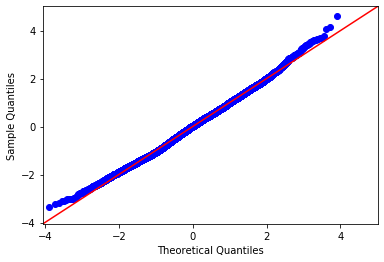

In [96]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [97]:
plt.scatter(y='price',x='bedrooms',data = df_final2)

NameError: name 'df_final2' is not defined

# Answering our interesting questions

## How crazy was the housing market in Seattle in 2014/2015?

We observed arbitrarily that some of the houses that had been sold in this period twice, and had been sold for huge profits. We wanted to investigate this further...

In [ ]:
df_resold = pd.DataFrame(data = df_final[df_final.duplicated(subset='id', keep = False)], columns = ['zipcode','id', 'date_formatted','yr_built', 'yr_renovated','age_yr_sold','grade', 'condition','price']).sort_values(by = ['zipcode', 'id'])
df_resold.reset_index(inplace = True)
df_resold.head()

In [ ]:
df_resold['price_percent_change'] = pd.Series()

for i in range(len(df_resold)):
    if i == 0:
        df_resold.iloc[i,10]= np.nan
    else:
        if df_resold.iloc[i,2] == df_resold.iloc[i-1,2]:
            df_resold.iloc[i,10] = (df_resold.iloc[i,9] - df_resold.iloc[i-1,9])/df_resold.iloc[i,9]
        else:
            df_resold.iloc[i,10] = np.nan

df_resold.head()

In [ ]:
#mean percentage change per zipcode

df_resold.groupby(df_resold['zipcode'])['price_percent_change'].mean().sort_values(ascending = False).head(20)

In [ ]:
#calculate days between date sold per id

import datetime

df_resold['mean_days'] = pd.Series()

for i in range(len(df_resold)):
    if i == 0:
        df_resold.iloc[i,11]= np.nan
    else:
        if df_resold.iloc[i,2] == df_resold.iloc[i-1,2]:
            date1 = df_resold.iloc[i,3]
            date2 = df_resold.iloc[i-1,3]
            df_resold.iloc[i,11] = (date1 - date2).days
        else:
            df_resold.iloc[i,11] = np.nan
            
df_resold.head(20)

In [ ]:
#mean percentage change and days per zipcode

df_resold.groupby(df_resold['zipcode'])['price_percent_change','mean_days'].mean().sort_values(by="price_percent_change", ascending = False)   

There is some actual madness going on with this data. We could investiaget further into the renovations of these houses, but even that wouldn't be enough explanation as to why we have so many people making hundreds of thousands of dollars profit on buying and selling their homes less than a year later. 

## What year's houses have lasted the best?

We will plot condition against age, and expect to see a decent corrolation showing that the older houses are in poorer condition. We shouldn't include houses that that been renovated. We could even run a univariate analysis to find which year/time period buck the trend more that you'd expect.


In [ ]:
df_test = pd.read_csv("kc_house_data.csv")
df_condition_test = df_test.drop(columns=['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'grade',
       'sqft_above', 'sqft_basement', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'])
df_condition_test.head()

In [ ]:
df2 = df_condition_test.copy()
df1 = df_condition_test.loc[(df_condition_test["yr_renovated"]>0.0)]
df1.index
df2.drop(index = df1.index, axis = 0, inplace = True)
df2.head()

In [ ]:
df2.drop(columns=['yr_renovated'])

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))

df2.groupby(['yr_built']).mean().plot(ax=ax, ylim = (2.9,4.0), grid = True)



As we can see above, these houses have not been renovated, and the condition of them today varies. It is interesting to note that the houses that are currently in the best condition were those built in 1917, and those that were the worst was in 1931. The houses built in 1931 were those closest to the stock market crash of 1929 (very few houses built in 1930), and as there was uch less money, the houses were not built to last. Isn't it interesting how the condition of houses has been on a steady decline since 1975? 

## Is it worth adding another bathroom, assuming it costs $25,000 to do so? 


This question will be asked by looking at our final model